# Time Series Analysis with Python

## What is a Time Series?
A time series is a sequence of moments-in-time observations. The sequence of data is either uniformly spaced at a specific frequency, or sporadically spaced in the case of a phone call history log.

Having an expert understanding of time series data and how to manipulate it is required for investing and trading research. This tutorial will focus on analyzing stock data using time series analysis with Python and Pandas. All code and associated data can be found in the Analyzing Alpha Github. 

## Understanding Datetimes and Timedeltas
It's critical to understand the difference between a moment, duration, and period in time before we can fully understand time series analysis in Python.

| **Type**          | **Description**                      | **Examples**                                       |
| ----------------- | ------------------------------------ | -------------------------------------------------- |
| Date (Moment)     | Day of the year                      | 2019-09-30, September 30th, 2019                   |
| Time (Moment)     | Single point in time                 | 6 hours, 6.5 minutes, 6.09 seconds, 6 milliseconds |
| Datetime (Moment) | Combination of date and time         | 2019-09-30 06:00:00, September 30th, 2019 at 6:00  |
| Duration          | Difference between two moments. | 2 days, 4 hours, 10 seconds                        |
| Period            | Grouping of time                       | 2019Q3, January                                    |


## Python's Datetime Module
[datetime](https://docs.python.org/3/library/datetime.html#module-datetime) supplies classes to enable date and time manipulation in both simple and complex ways.

#### Creating Moments

[Dates](https://docs.python.org/3/library/datetime.html#date-objects), [datetimes](https://docs.python.org/3/library/datetime.html#datetime-objects), and [times](https://docs.python.org/3/library/datetime.html#time-objects) are each a separate class, and we can create them in a variety of ways, including directly and through [parsing strings](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior).

In [ ]:
import datetime
date = datetime.date(2019,9,30)
datetime1 = datetime.datetime(2019,9,30,6,30,9,123456)
datetime2_string = "10 03 2019 13:37:00"
datetime2 = datetime.datetime.strptime(datetime2_string,
                                       '%m %d %Y %X')
datetime3_string = "Thursday, October 03, 19 1:37 PM"
datetime3 = datetime.datetime.strptime(datetime3_string,
                                       '%A, %B %d, %y %I:%M %p')
time = datetime.time(6,30,9,123456)
now = datetime.datetime.today()
today = datetime.date.today()
print(type(date))
print(date)
print(type(datetime1))
print(datetime1)
print(datetime2)
print(datetime3)
print(type(time))
print(time)
print(now)
print(today)

<class 'datetime.date'>
2019-09-30
<class 'datetime.datetime'>
2019-09-30 06:30:09.123456
2019-10-03 13:37:00
2019-10-03 13:37:00
<class 'datetime.time'>
06:30:09.123456
2019-10-07 12:43:26.337336
2019-10-07


#### Creating Durations
[timedeltas](https://docs.python.org/3/library/datetime.html#timedelta-objects) represent durations in time. They can be added or subtracted from moments in time.

In [ ]:
from datetime import timedelta
daysdelta = timedelta(days=5)
alldelta = timedelta(days=1, seconds=2, 
                     microseconds=3,
                     milliseconds=4,
                     minutes=5,
                     hours=6,
                     weeks=7)
future = now + daysdelta
past = now - alldelta
print(type(future))
print(future)
print(type(past))
print(past)

<class 'datetime.datetime'>
2019-10-12 12:43:26.337336
<class 'datetime.datetime'>
2019-08-18 06:38:24.333333


### Accessing Datetime Attributes
Class and object attributes can help us isolate the information we want to see. I've listed the most common, but you can find the exhaustive list on the [datetime module's documentation](https://docs.python.org/3/library/datetime.html#datetime-objects).

| Class / Object          | Attribute        | Description                                                    |
| ----------------------- | ---------------- | -------------------------------------------------------------- |
| Shared Class Attributes | class.min        | Earliest representable date, datetime, time                    |
|                         | class.max        | Latest representable date, datetime, time                      |
|                         | class.resolution | The smallest difference between two dates, datetimes, or times |
| Date / Datetime         | object.year      | Returns year                                                   |
|                         | object.month     | Returns month of year (1 - 12)                                 |
|                         | object.day       | Returns day of month (1-32)                                    |
| Time / Datetime         | object.hour      | Returns hour (0-23)                                            |
|                         | object.minute    | Returns minute (0-59)                                          |
|                         | object.second    | Returns second (0-59)                                          |

In [ ]:
print(datetime.datetime.min)
print(datetime.datetime.max)
print(datetime.datetime.resolution)
print(datetime1.year)
print(datetime1.month)
print(datetime1.day)
print(datetime1.hour)
print(datetime1.minute)
print(datetime1.second)
print(datetime1.microsecond)

0001-01-01 00:00:00
9999-12-31 23:59:59.999999
0:00:00.000001
2019
9
30
6
30
9
123456


## Time Series in Pandas: Moments in Time

Pandas was developed at hedge fund AQR by Wes McKinney to enable quick analysis of financial data. Pandas is an extension of NumPy that supports vectorized operations enabling quick manipulation and analysis of time series data.

### Timestamps: Moments in Time
[pandas.Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) extends NumPy's datetime64 and is used to represent datetime data in Pandas. Pandas does not require Python's standard library datetime. Let's create a Timestamp now using [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) and pass in the above example data.

In [ ]:
import pandas as pd
print(type(pd.to_datetime('2019-09-30')))
print(pd.to_datetime('2019-09-30'))
print(pd.to_datetime('September 30th, 2019'))
print(pd.to_datetime('6:00:00'))
print(pd.to_datetime('2019-09-30 06:30:06'))
print(pd.to_datetime('September 30th, 2019 06:09.0006'))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2019-09-30 00:00:00
2019-09-30 00:00:00
2019-10-06 06:00:00
2019-09-30 06:30:06
2019-09-30 06:09:00


### Timedeltas in Pandas: Durations of Time
[pandas.Timedelta](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Timedelta.html) is used to represent durations of time internally in Pandas.

In [ ]:
timestamp1 = pd.to_datetime('September 30th, 2019 06:09.0006')
timestamp2 = pd.to_datetime('October 2nd, 2019 06:09.0006')
delta = timestamp2 - timestamp1
print(type(timestamp1))
print(type(delta))
print(delta)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
2 days 00:00:00


### Creating a Time Series in Pandas
Let's get Apple's stock history provided by an [Intrinio developer sandbox](https://product.intrinio.com/developer-sandbox).

In [ ]:
import pandas as pd
import urllib
url = "https://raw.githubusercontent.com/leosmigel/analyzingalpha/master/2019-10-06-time-series-analysis-with-python/apple_price_history.csv"
with urllib.request.urlopen(url) as f:
  apple_price_history = pd.read_csv(f)

apple_price_history[['open', 'high', 'low', 'close', 'volume']].head()

,open,high,low,close,volume
0,28.75,28.87,28.75,28.75,2093900
1,27.38,27.38,27.25,27.25,785200
2,25.37,25.37,25.25,25.25,472000
3,25.87,26.00,25.87,25.87,385900
4,26.63,26.75,26.63,26.63,327900


Let's review the data types or dtypes of the dataframe to see if we have any datetime information.

In [ ]:
apple_price_history.dtypes

id               int64
date            object
open           float64
high           float64
low            float64
close          float64
volume           int64
adj_open       float64
adj_high       float64
adj_low        float64
adj_close      float64
adj_volume       int64
intraperiod       bool
frequency       object
security_id      int64
dtype: object

Notice how the date column that contains our date information is a pandas `object`. We could have told pandas to `parse_dates` and read in our column as a date, but we can adjust it after the fact, also.

Let's change our dataframe's RangeIndex into a DatetimeIndex. And for good measure, we'll show how to read the data in with a DatetimeIndex from `read_csv`.

In [ ]:
apple_price_history['date'] = apple_price_history['date'].astype(np.datetime64)
apple_price_history.dtypes

id                      int64
date           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume              int64
intraperiod              bool
frequency              object
security_id             int64
dtype: object

In [ ]:
apple_price_history.set_index('date', inplace=True)
print(apple_price_history.index.dtype)
print(apple_price_history[['open', 'high', 'low', 'close']].head())
apple_price_history.index[0:10]

datetime64[ns]
             open   high    low  close
date                                  
1980-12-12  28.75  28.87  28.75  28.75
1980-12-15  27.38  27.38  27.25  27.25
1980-12-16  25.37  25.37  25.25  25.25
1980-12-17  25.87  26.00  25.87  25.87
1980-12-18  26.63  26.75  26.63  26.63


DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
import numpy as np
import urllib.request

names = ['open', 'high', 'low', 'close', 'volume']
url = 'https://raw.githubusercontent.com/leosmigel/analyzingalpha/master/2019-10-06-time-series-analysis-with-python/apple_price_history.csv'
with urllib.request.urlopen(url) as f:
  apple_price_history = pd.read_csv(f,
                                    parse_dates=['date'],
                                    index_col='date',
                                    usecols=['date',
                                             'adj_open',
                                             'adj_high',
                                             'adj_low',
                                             'adj_close',
                                             'adj_volume'])
apple_price_history.columns = names
print(apple_price_history.dtypes)
print(apple_price_history.index[:5])
print(apple_price_history.head())

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object
DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18'],
              dtype='datetime64[ns]', name='date', freq=None)
                open      high       low     close     volume
date                                                         
1980-12-12  0.410073  0.411785  0.410073  0.410073  117258400
1980-12-15  0.390532  0.390532  0.388678  0.388678   43971200
1980-12-16  0.361863  0.361863  0.360151  0.360151   26432000
1980-12-17  0.368995  0.370849  0.368995  0.368995   21610400
1980-12-18  0.379835  0.381546  0.379835  0.379835   18362400


### Adding Datetimes from Strings
Frequently, dates will be in a format that we can't read. We can use dt.strftime to convert the string into a date. We used [strptime](https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior) when creating [the sp500 dataset](https://analyzingalpha.com/sp500-historical-components-and-changes). 

`sp500.loc[:,'date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))`

### Time Series Selection


#### Datetime Selection by Day, Month, or Year
We can now easily select and slice dates using the index with `loc`.

In [ ]:
apple_price_history.index
print(apple_price_history.loc['2018'].head())
print(apple_price_history.loc['2018-06'].head())
print(apple_price_history.loc['2018-06-01': '2018-06-05'])
apple_price_history.loc['2018-6-1']

                  open        high         low       close    volume
date                                                                
2018-01-02  165.657452  167.740826  164.781266  167.701884  25555934
2018-01-03  167.964740  169.931290  167.409823  167.672678  29517899
2018-01-04  167.974475  168.879867  167.526647  168.451510  22434597
2018-01-05  168.850661  170.729592  168.470981  170.369382  23660018
2018-01-08  169.736582  170.963241  169.327695  169.736582  20567766
                  open        high         low       close    volume
date                                                                
2018-06-01  184.471622  186.697946  184.234938  186.678320  23442510
2018-06-04  188.047203  189.798784  187.767539  188.238552  26266174
2018-06-05  189.450430  190.309049  188.758629  189.690843  21565963
2018-06-06  190.004852  190.446427  188.326867  190.348300  20933619
2018-06-07  190.505304  190.564181  188.734097  189.838035  21347180
                  open        high

open      1.844716e+02
high      1.866979e+02
low       1.842349e+02
close     1.866783e+02
volume    2.344251e+07
Name: 2018-06-01 00:00:00, dtype: float64

#### Using the Datetime Accessor
The [dt accessor](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-dt) has multiple datetime properties and methods can be used on series datetime elements as found in the [Series API Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-dt).


| Property | Description |
| -------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| Series.dt.date             | Returns numpy array of python datetime.date objects (namely, the date part of Timestamps without timezone information). |
| Series.dt.time             | Returns numpy array of datetime.time.                                                                                   |
| Series.dt.timetz           | Returns numpy array of datetime.time also containing timezone information.                                              |
| Series.dt.year             | The year of the datetime.                                                                                               |
| Series.dt.month            | The month as January=1, December=12.                                                                                    |
| Series.dt.day              | The days of the datetime.                                                                                               |
| Series.dt.hour             | The hours of the datetime.                                                                                              |
| Series.dt.minute           | The minutes of the datetime.                                                                                            |
| Series.dt.second           | The seconds of the datetime.                                                                                            |
| Series.dt.microsecond      | The microseconds of the datetime.                                                                                       |
| Series.dt.nanosecond       | The nanoseconds of the datetime.                                                                                        |
| Series.dt.week             | The week ordinal of the year.                                                                                           |
| Series.dt.weekofyear       | The week ordinal of the year.                                                                                           |
| Series.dt.dayofweek        | The day of the week with Monday=0, Sunday=6.                                                                            |
| Series.dt.weekday          | The day of the week with Monday=0, Sunday=6.                                                                            |
| Series.dt.dayofyear        | The ordinal day of the year.                                                                                            |
| Series.dt.quarter          | The quarter of the date.                                                                                                |
| Series.dt.is_month_start   | Indicates whether the date is the first day of the month.                                                               |
| Series.dt.is_month_end     | Indicates whether the date is the last day of the month.                                                                |
| Series.dt.is_quarter_start | Indicator for whether the date is the first day of a quarter.                                                           |
| Series.dt.is_quarter_end   | Indicator for whether the date is the last day of a quarter.                                                            |
| Series.dt.is_year_start    | Indicate whether the date is the first day of a year.                                                                   |
| Series.dt.is_year_end      | Indicate whether the date is the last day of the year.                                                                  |
| Series.dt.is_leap_year     | Boolean indicator if the date belongs to a leap year.                                                                   |
| Series.dt.daysinmonth      | The number of days in the month.                                                                                        |
| Series.dt.days_in_month    | The number of days in the month.                                                                                        |
| Series.dt.tz               | Return timezone, if any.                                                                                                |
| Series.dt.freq             |                                                                                                                         |

| Method | Description |
| ----------------------------------------------- | ------------------------------------------------------------------------ |
| Series.dt.to_period(self, \*args, \*\*kwargs)   | Cast to PeriodArray/Index at a particular frequency.                     |
| Series.dt.to_pydatetime(self)                   | Return the data as an array of native Python datetime objects.           |
| Series.dt.tz_localize(self, \*args, \*\*kwargs) | Localize tz-naive Datetime Array/Index to tz-aware Datetime Array/Index. |
| Series.dt.tz_convert(self, \*args, \*\*kwargs)  | Convert tz-aware Datetime Array/Index from one time zone to another.     |
| Series.dt.normalize(self, \*args, \*\*kwargs)   | Convert times to midnight.                                               |
| Series.dt.strftime(self, \*args, \*\*kwargs)    | Convert to Index using specified date_format.                            |
| Series.dt.round(self, \*args, \*\*kwargs)       | Perform round operation on the data to the specified freq.               |
| Series.dt.floor(self, \*args, \*\*kwargs)       | Perform floor operation on the data to the specified freq.               |
| Series.dt.ceil(self, \*args, \*\*kwargs)        | Perform ceil operation on the data to the specified freq.                |
| Series.dt.month_name(self, \*args, \*\*kwargs)  | Return the month names of the DateTimeIndex with specified locale.       |
| Series.dt.day_name(self, \*args, \*\*kwargs)    | Return the day names of the DateTimeIndex with specified locale.         |

#### Periods
| Period | |
| -------------------- |  |
| Series.dt.qyear      |  |
| Series.dt.start_time |  |
| Series.dt.end_time   |  |


In [ ]:
dates = ['2019-01-01', '2019-04-02', '2019-07-03']
df = pd.Series(dates, dtype='datetime64[ns]')
print(df.dt.quarter)
print(df.dt.day_name())




0    1
1    2
2    3
dtype: int64
0      Tuesday
1      Tuesday
2    Wednesday
dtype: object


 DatetimeIndex includes most of the same properties and methods as the dt.accessor.

In [ ]:
print(apple_price_history.index.quarter)
apple_price_history.index.day_name()

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='date', length=9789)


Index(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Friday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype='object', name='date', length=9789)

#### Frequency Selection

Time series can be associated with a frequency in Pandas when it is uniformly spaced. 

[pandas.date_range](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html) is a function that allows us to create a sequence of evenly spaced dates.

In [ ]:
dates = pd.date_range('2019-01-01', '2019-12-31', freq='D')
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

Instead of specifying a start or end date, we can substitute a period and adjust the frequency.

In [ ]:
dates = pd.date_range('2019-01-01', periods=6, freq='M')
print(dates)
hours = pd.date_range('2019-01-01', periods=24, freq='H')
print(hours)

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               '2019-01-01 10:00:00', '2019-01-01 11:00:00',
               '2019-01-01 12:00:00', '2019-01-01 13:00:00',
               '2019-01-01 14:00:00', '2019-01-01 15:00:00',
               '2019-01-01 16:00:00', '2019-01-01 17:00:00',
               '2019-01-01 18:00:00', '2019-01-01 19:00:00',
               '2019-01-01 20:00:00', '2019-01-01 21:00:00',
               '2019-01-01 22:00:00', '2019-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')



[pandas.DataFrame.asfreq](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asfreq.html) returns a dataframe or series with a new frequency. New rows will be added for moments that are missing in the data and filled with NaN or using a method we specify. We often need to provide an offset alias to get the desired time-frequency.


#### Offset Aliases

| Alias | Description                                  |
| --------- | ------------------------------------------------ |
| B         | business day frequency                           |
| C         | custom business day frequency                    |
| D         | calendar day frequency                           |
| W         | weekly frequency                                 |
| M         | month end frequency                              |
| SM        | semi-month end frequency (15th and end of month) |
| BM        | business month end frequency                     |
| CBM       | custom business month end frequency              |
| MS        | month start frequency                            |
| SMS       | semi-month start frequency (1st and 15th)        |
| BMS       | business month start frequency                   |
| CBMS      | custom business month start frequency            |
| Q         | quarter end frequency                            |
| BQ        | business quarter end frequency                   |
| QS        | quarter start frequency                          |
| BQS       | business quarter start frequency                 |
| A, Y      | year end frequency                               |
| BA, BY    | business year end frequency                      |
| AS, YS    | year start frequency                             |
| BAS, BYS  | business year start frequency                    |
| BH        | business hour frequency                          |
| H         | hourly frequency                                 |
| T, min    | minutely frequency                               |
| S         | secondly frequency                               |
| L, ms     | milliseconds                                     |
| U, us     | microseconds                                     |
| N         | nanoseconds                                      |

In [ ]:
print(apple_price_history.asfreq('BA').head())
apple_quarterly_history = apple_price_history.asfreq('BM')
print(type(apple_quarterly_history))
print(apple_quarterly_history.head())

                open      high       low     close    volume
date                                                        
1980-12-31  0.488522  0.488522  0.486810  0.486810   8937600
1981-12-31  0.315649  0.317361  0.315649  0.315649  13664000
1982-12-31  0.427903  0.433180  0.426048  0.426048  12415200
1983-12-30  0.347742  0.356585  0.345888  0.347742  22965600
1984-12-31  0.415351  0.417205  0.415351  0.415351  51940000
<class 'pandas.core.frame.DataFrame'>
                open      high       low     close      volume
date                                                          
1980-12-31  0.488522  0.488522  0.486810  0.486810   8937600.0
1981-01-30  0.406507  0.406507  0.402942  0.402942  11547200.0
1981-02-27  0.377981  0.381546  0.377981  0.377981   3690400.0
1981-03-31  0.353020  0.353020  0.349454  0.349454   3998400.0
1981-04-30  0.404796  0.408219  0.404796  0.404796   3152800.0


#### Filling Data
[pandas.Series.asfreq](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.asfreq.html) allows us to provide a filling method replacing NaN values.

In [ ]:
print(apple_price_history['close'].asfreq('H').head())
print(apple_price_history['close'].asfreq('H', method='ffill').head())

date
1980-12-12 00:00:00    0.410073
1980-12-12 01:00:00         NaN
1980-12-12 02:00:00         NaN
1980-12-12 03:00:00         NaN
1980-12-12 04:00:00         NaN
Freq: H, Name: close, dtype: float64
date
1980-12-12 00:00:00    0.410073
1980-12-12 01:00:00    0.410073
1980-12-12 02:00:00    0.410073
1980-12-12 03:00:00    0.410073
1980-12-12 04:00:00    0.410073
Freq: H, Name: close, dtype: float64


### Resampling: Upsampling & Downsampling
[pandas.Dataframe.resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) returns a resampling object, very similar to a groupby object, for which to run various calculations on.

We often need to lower (downsampling) or increase (upsampling) the frequency of our time series data. If we have daily or monthly sales data, it may be useful to downsample it into quarterly data. Alternatively, we may want to upsample our data to match the frequency of another series we're using to make predictions. Upsampling is less common, and it requires [interpolation](https://en.wikipedia.org/wiki/Interpolation).

In [ ]:
apple_quarterly_history = apple_price_history.resample('BM')
print(type(apple_quarterly_history))
print(apple_quarterly_history.agg({'high':'max', 'low':'min'})[:5])


<class 'pandas.core.resample.DatetimeIndexResampler'>
                high       low
date                          
1980-12-31  0.515337  0.360151
1981-01-30  0.495654  0.402942
1981-02-27  0.411785  0.338756
1981-03-31  0.385112  0.308375
1981-04-30  0.418917  0.345888


We can now use all of the properties and methods we discovered above.

In [ ]:
print(apple_price_history.index.dayofweek)
print(apple_price_history.index.weekofyear)
print(apple_price_history.index.year)
print(apple_price_history.index.day_name())

Int64Index([4, 0, 1, 2, 3, 4, 0, 1, 2, 4,
            ...
            2, 3, 4, 0, 1, 2, 3, 4, 0, 1],
           dtype='int64', name='date', length=9789)
Int64Index([50, 51, 51, 51, 51, 51, 52, 52, 52, 52,
            ...
            37, 37, 37, 38, 38, 38, 38, 38, 39, 39],
           dtype='int64', name='date', length=9789)
Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date', length=9789)
Index(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Friday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype='object', name='date', length=9789)


In [ ]:
datetime = pd.to_datetime('2019-09-30 06:54:32.54321')
print(datetime.floor('H'))
print(datetime.ceil('T'))
print(datetime.round('S'))
print(datetime.to_period('W'))
print(datetime.to_period('Q'))
datetime.to_period('Q').end_time

2019-09-30 06:00:00
2019-09-30 06:55:00
2019-09-30 06:54:33
2019-09-30/2019-10-06
2019Q3


Timestamp('2019-09-30 23:59:59.999999999')

### Rolling Windows: Smoothing & Moving Averages
[pandas.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) allow us to split the data into aggregated windows and apply a function such as the mean or sum. 

A typical example of this in trading is using the 50-day and 200-day moving averages to enter and exit an asset. 

Let's calculate the these for Apple. Notice that we need 50 days of data before we can calculate the rolling mean.

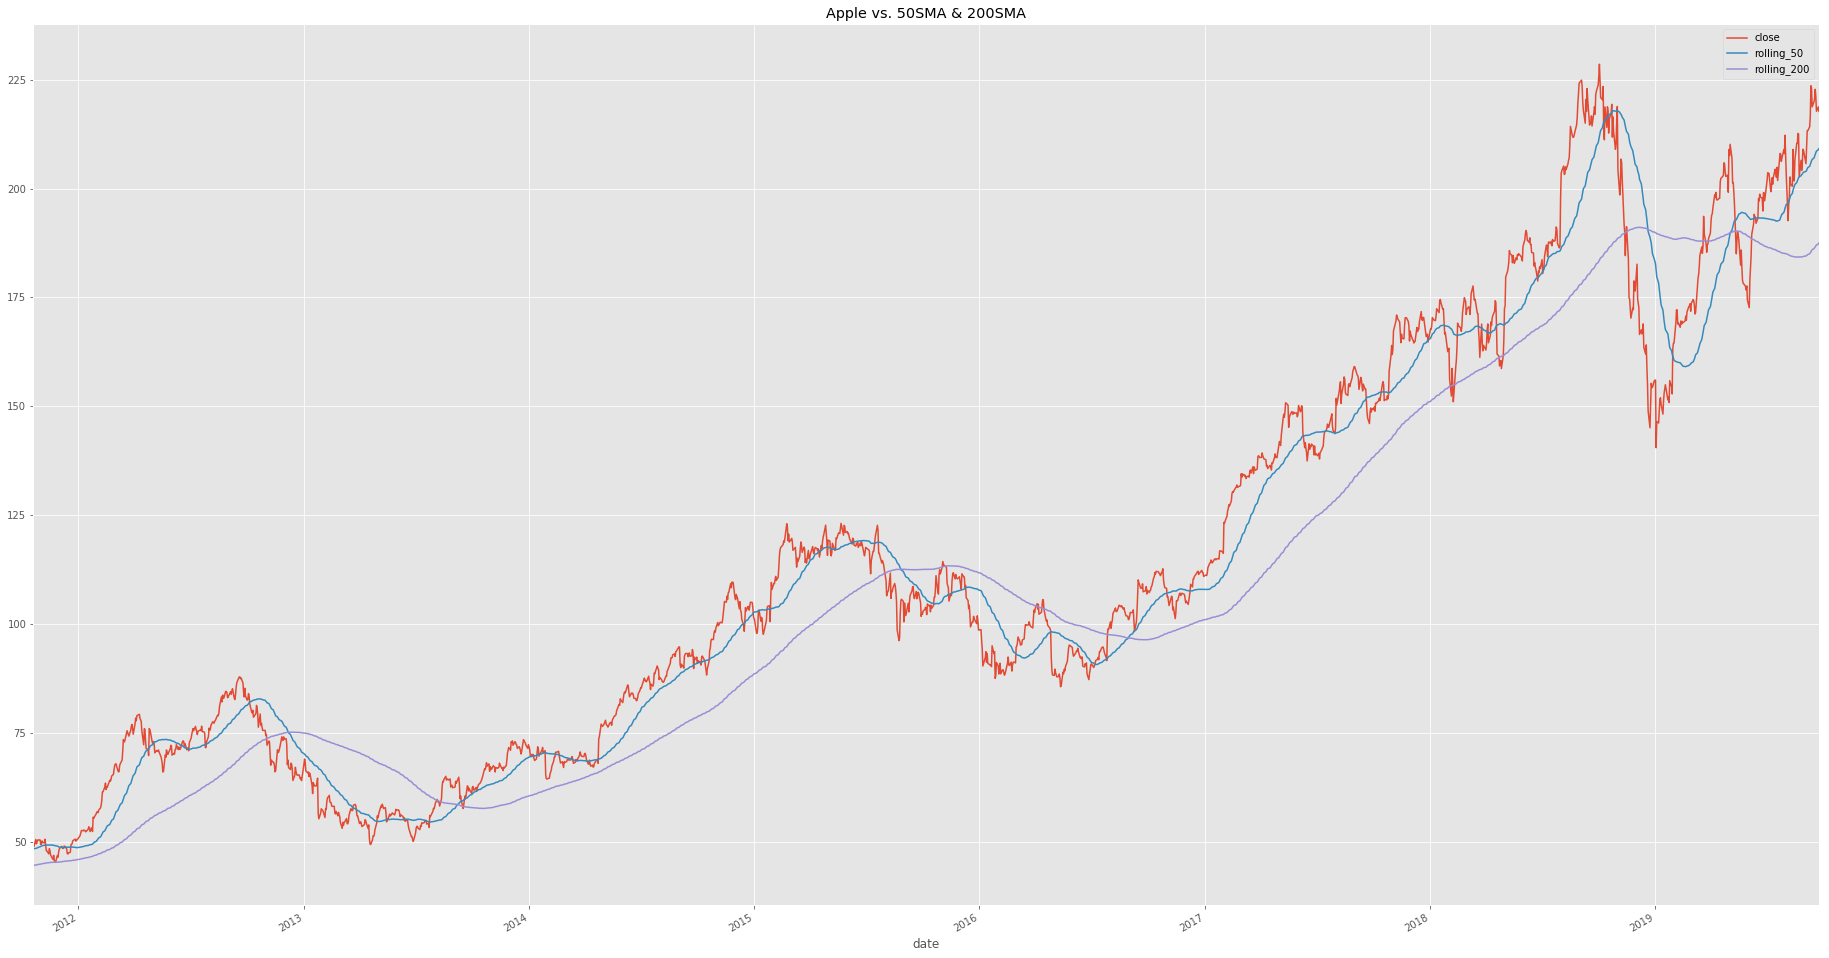

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

apple_price_history['rolling_50'] = apple_price_history.rolling(50).agg({'close':'mean'})
apple_price_history['rolling_200'] = apple_price_history.rolling(200).agg({'close':'mean'})
apple_price_history_recent = apple_price_history[-2000:]
apple_price_history_recent[['close', 'rolling_50', 'rolling_200']].plot(title='Apple vs. 50SMA & 200SMA', figsize=(32,18))


## Visualizing Time Series Data using Matplotlib
[Matplotlib](https://matplotlib.org/) makes it easy to visualize our Pandas time series data. [Seaborn](https://seaborn.pydata.org/) adds additional options and helps us make our graphs look prettier. Let's import matplotlib and seaborn to try out a few basic examples. This quick summary isn't an [in-depth guide on Python Visualization](https://analyzingalpha.com/python-data-visualization).

### Line Plot
[sns.lineplot](https://seaborn.pydata.org/api.html) draws a standard line plot. It works similar to [dataframe.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) that we've been using above.

Text(0.5, 1.0, 'Apple Stock Price History')

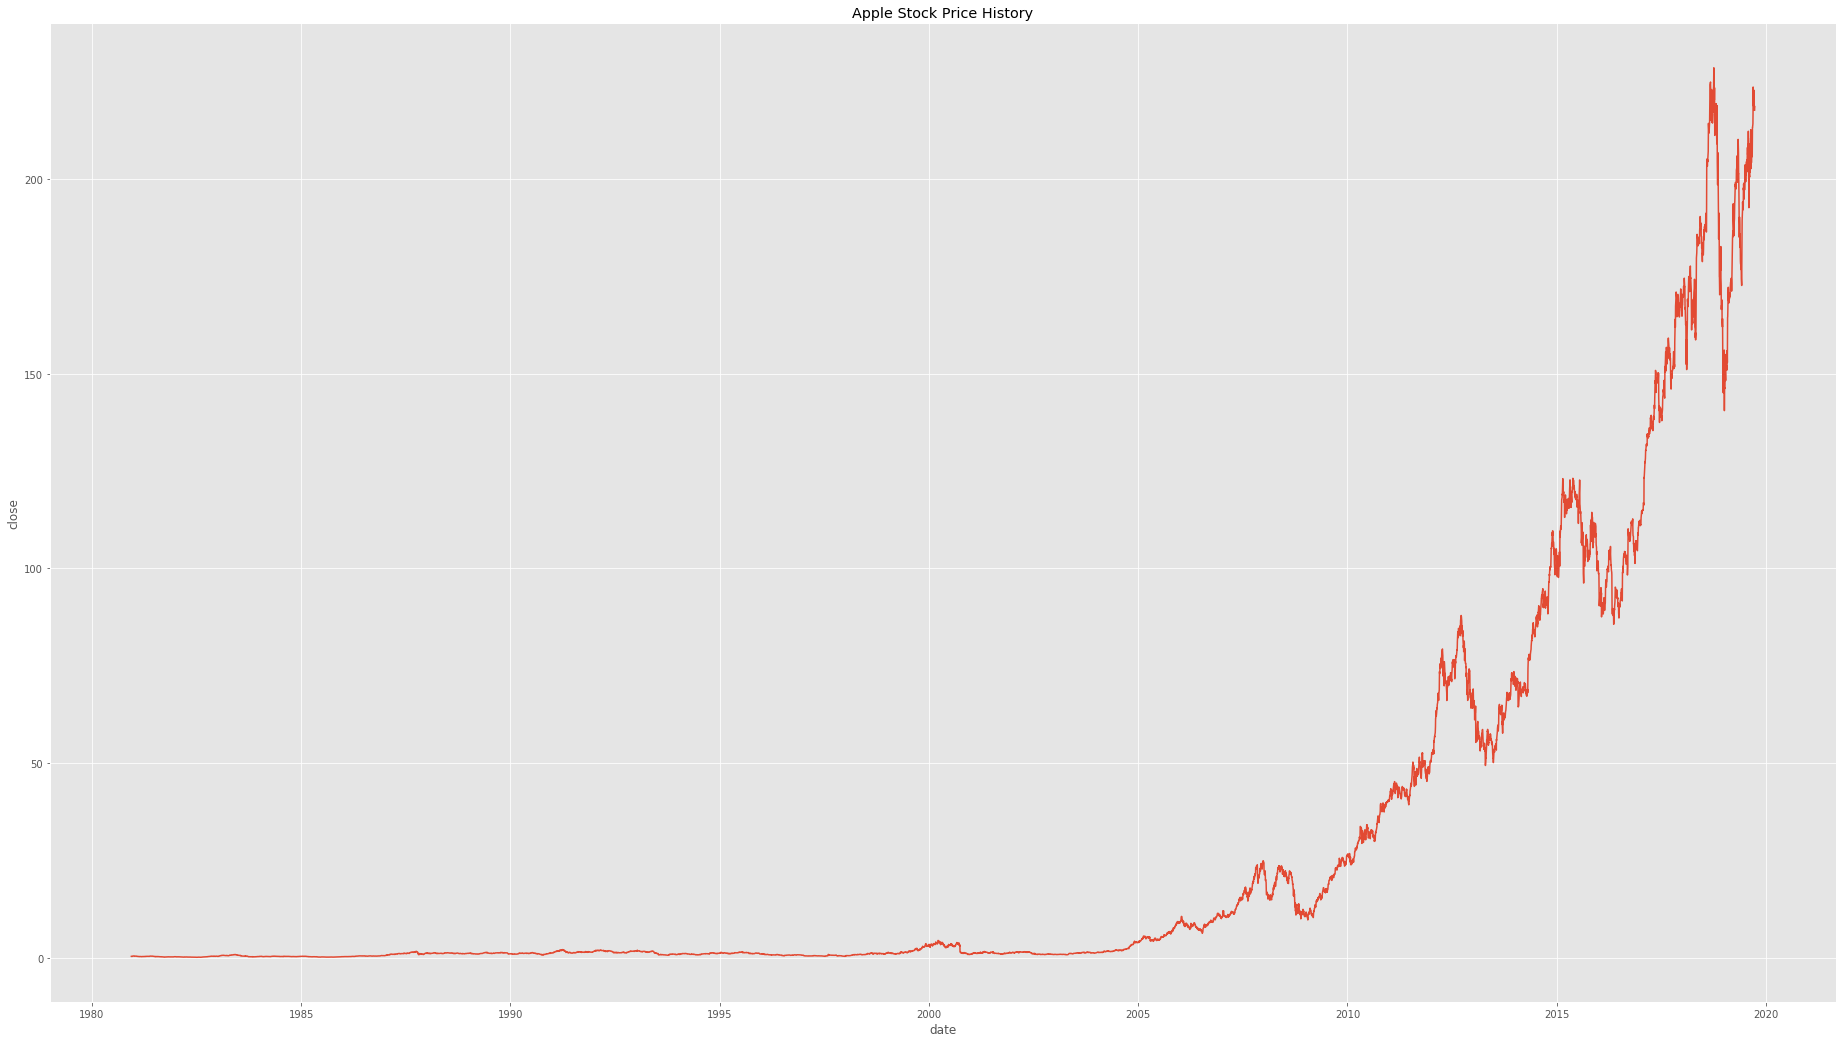

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(32,18))
sns.lineplot(x=apple_price_history.index, y='close', data=apple_price_history,
             ax=ax).set_title("Apple Stock Price History")

### Boxplots
[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) enables us to group and understand distributions in our data. It's often beneficial for seasonal data.

Text(0.5, 1.0, 'Apple Quarterly Price History')

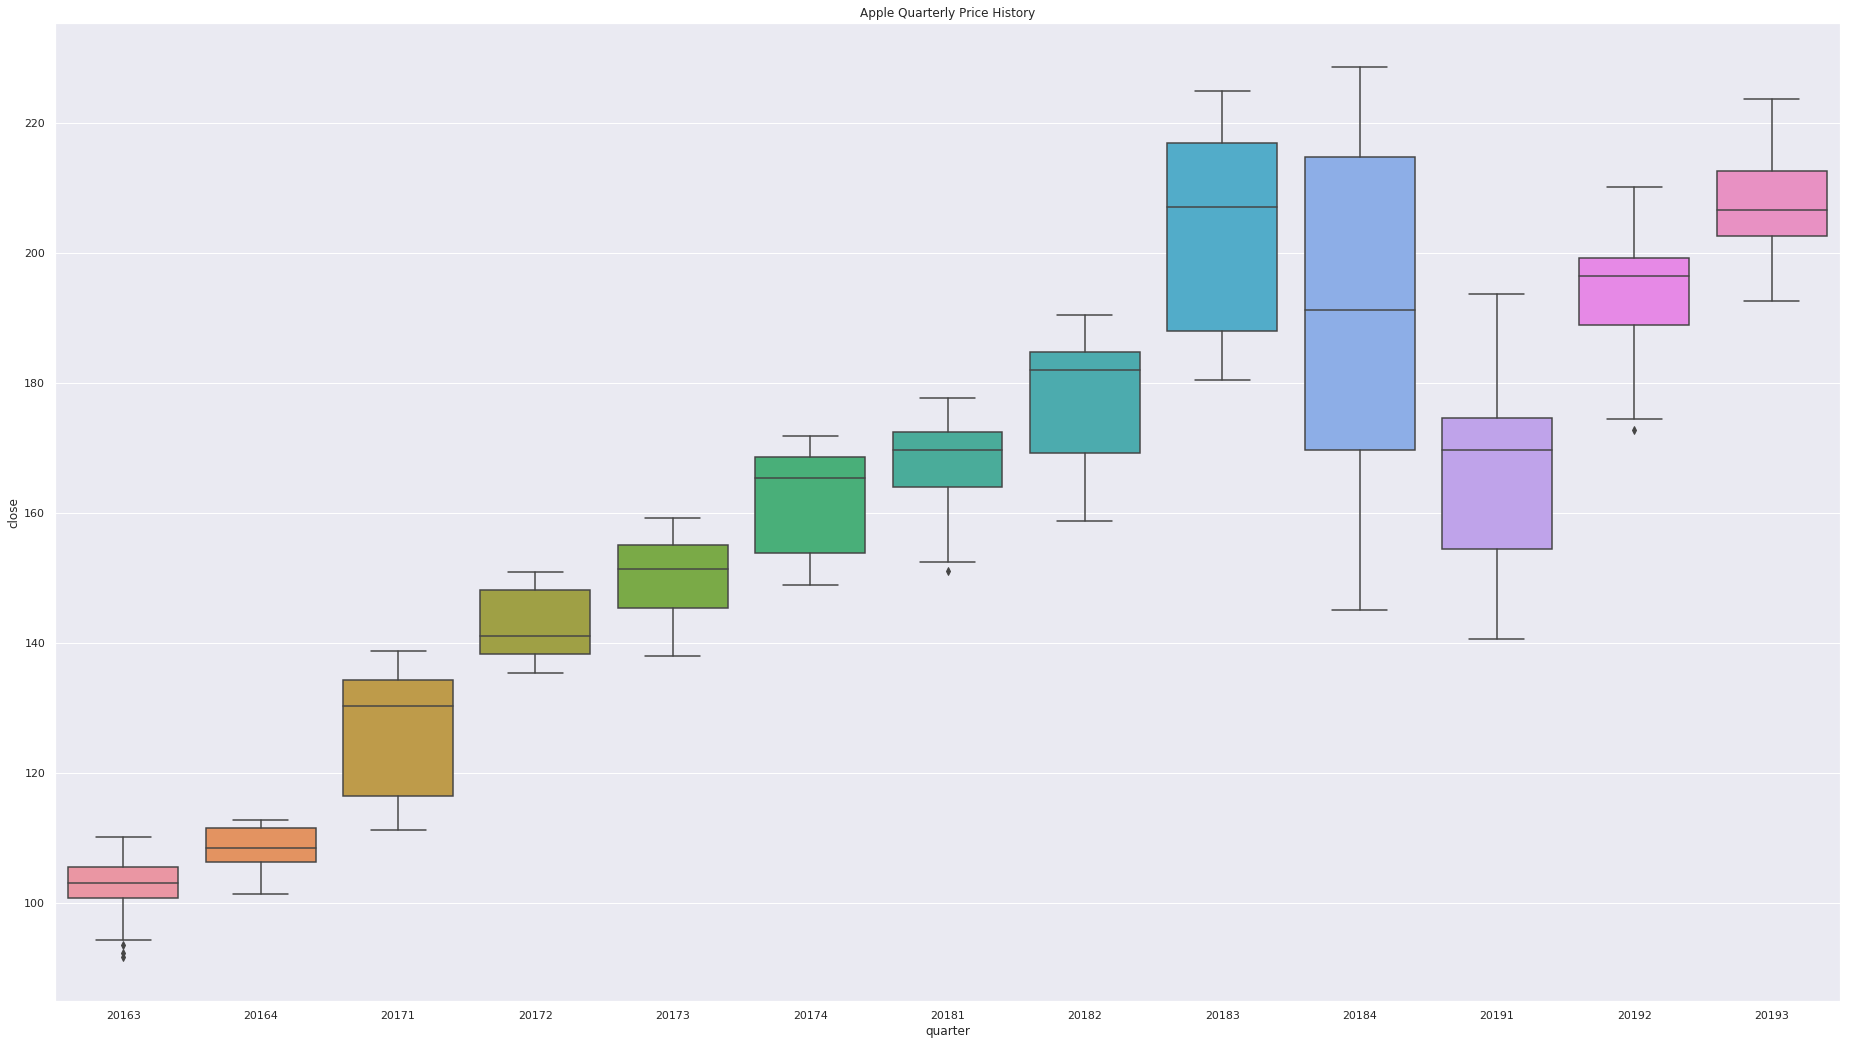

In [ ]:
apple_price_recent_history = apple_price_history[-800:].copy()
apple_price_recent_history['quarter'] = apple_price_recent_history.index.year.astype(str) \
                                      + apple_price_recent_history.index.quarter.astype(str)

sns.set(rc={'figure.figsize':(32, 18)})
sns.boxplot(data=apple_price_recent_history, x='quarter', y='close').set_title("Apple Quarterly Price History")

## Analyzing Time Series Data in Pandas


Time series analysis methods can be divided into two classes:
1. [Frequency domain methods](https://en.wikipedia.org/wiki/Frequency_domain)
2. [Time-domain methods](https://en.wikipedia.org/wiki/Time_domain)

Frequency domain methods analyze how much a signal changes over a frequency band such as the last 100 samples. Time-domain methods analyze how much a signal changes over a specified period of time such as the prior 100 seconds.

### Time Series Trend, Seasonality & Cyclicality

Time series data can be [decomposed into four components](https://en.wikipedia.org/wiki/Decomposition_of_time_series):
* Trend
* Seasonality
* Cyclicality
* Noise

Not all time series have trend, seasonality, or cyclicality; moreover, there must be enough data to support that seasonality, cyclicality or a trend exists.

It is not mandatory that all time series must exhibit trends or patterns, it could be completely random.

Time series data will often exhibit show gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at different time scales. Let's import Apple's sales data to review seasonality and trend.

### Trend
[Trends](https://en.wikipedia.org/wiki/Linear_trend_estimation) occur when there is an increasing or decreasing slope in the time series. Amazon's sales growth would be an example of an upward trend. Additionally, trends do not have to be linear. Trends can be deterministic and are a function of time, or stochastic where the trend is random.

### Seasonality
[Seasonality](https://en.wikipedia.org/wiki/Seasonality) occurs when there is a distinct repeating pattern, peaks and troughs, observed at regular intervals within a year. Apple's sales peak in Q4 would be an example of seasonality in Amazon's revenue numbers.

### Cyclicality
[Cyclicality]() occurs when there is a distinct repeating pattern, peaks and troughs, observed at irregular intervals. The [business cycle](https://en.wikipedia.org/wiki/Business_cycle) exhibits cyclicality.

Let's analyze Apple's revenue history and see if we can decompose it.

In [ ]:
import urllib
import pandas as pd
from scipy import stats

url = 'https://raw.githubusercontent.com/leosmigel/analyzingalpha/master/2019-10-06-time-series-analysis-with-python/apple_revenue_history.csv'
with urllib.request.urlopen(url) as f:
  apple_revenue_history = pd.read_csv(f, index_col=0)
apple_revenue_history['quarter'] = apple_revenue_history['fiscal_year'].apply(str) \
                                   + apple_revenue_history['fiscal_period'].str.upper()
slope, intercept, r_value, p_value, std_err = stats.linregress(apple_revenue_history.index,
                                                               apple_revenue_history['value'])
apple_revenue_history['line'] = slope * apple_revenue_history.index + intercept

#### Time Series Trend Graph with Trend Line

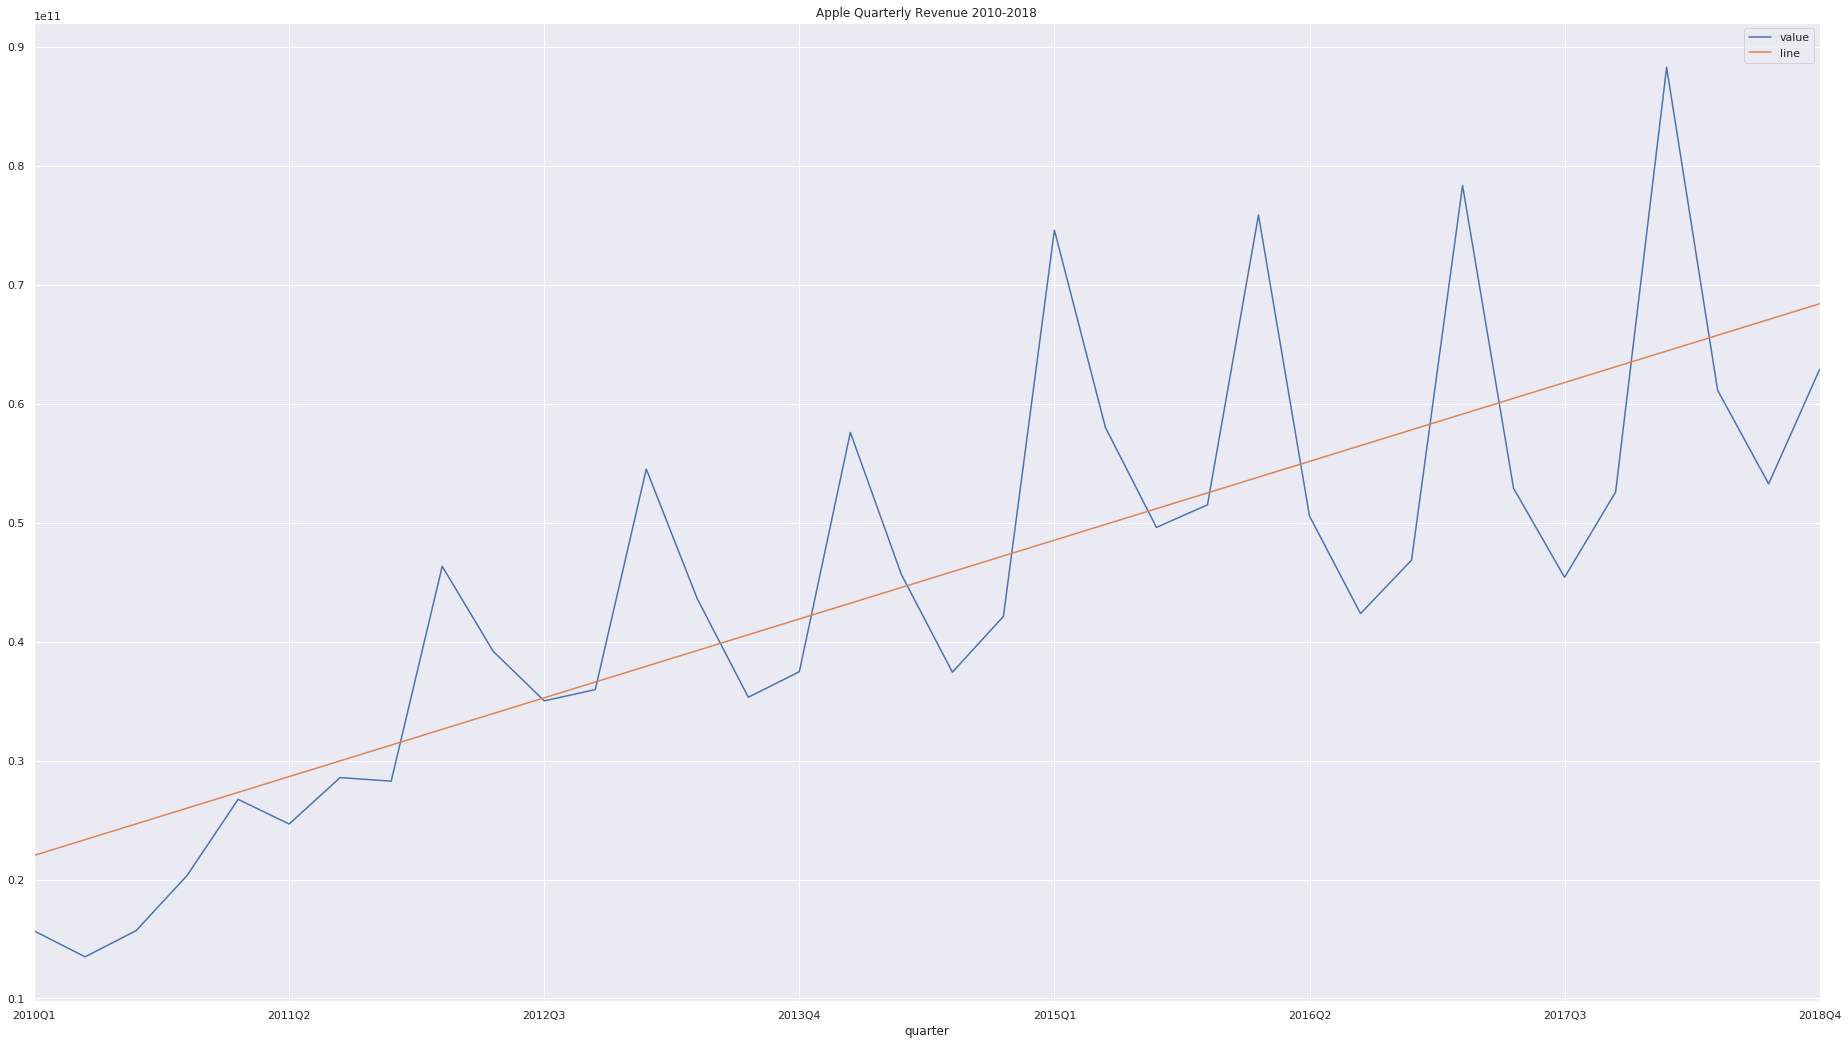

In [ ]:
fig = plt.figure(figsize=(32,18))
ax1 = fig.add_subplot(1,1,1)

apple_revenue_history.plot(y='value', x='quarter', title='Apple Quarterly Revenue 2010-2018', ax=ax1)
apple_revenue_history.plot(y='line', x='quarter', title='Apple Quarterly Revenue 2010-2018', ax=ax1)

#### Time Series Stacked Graph for Cycle Analysis

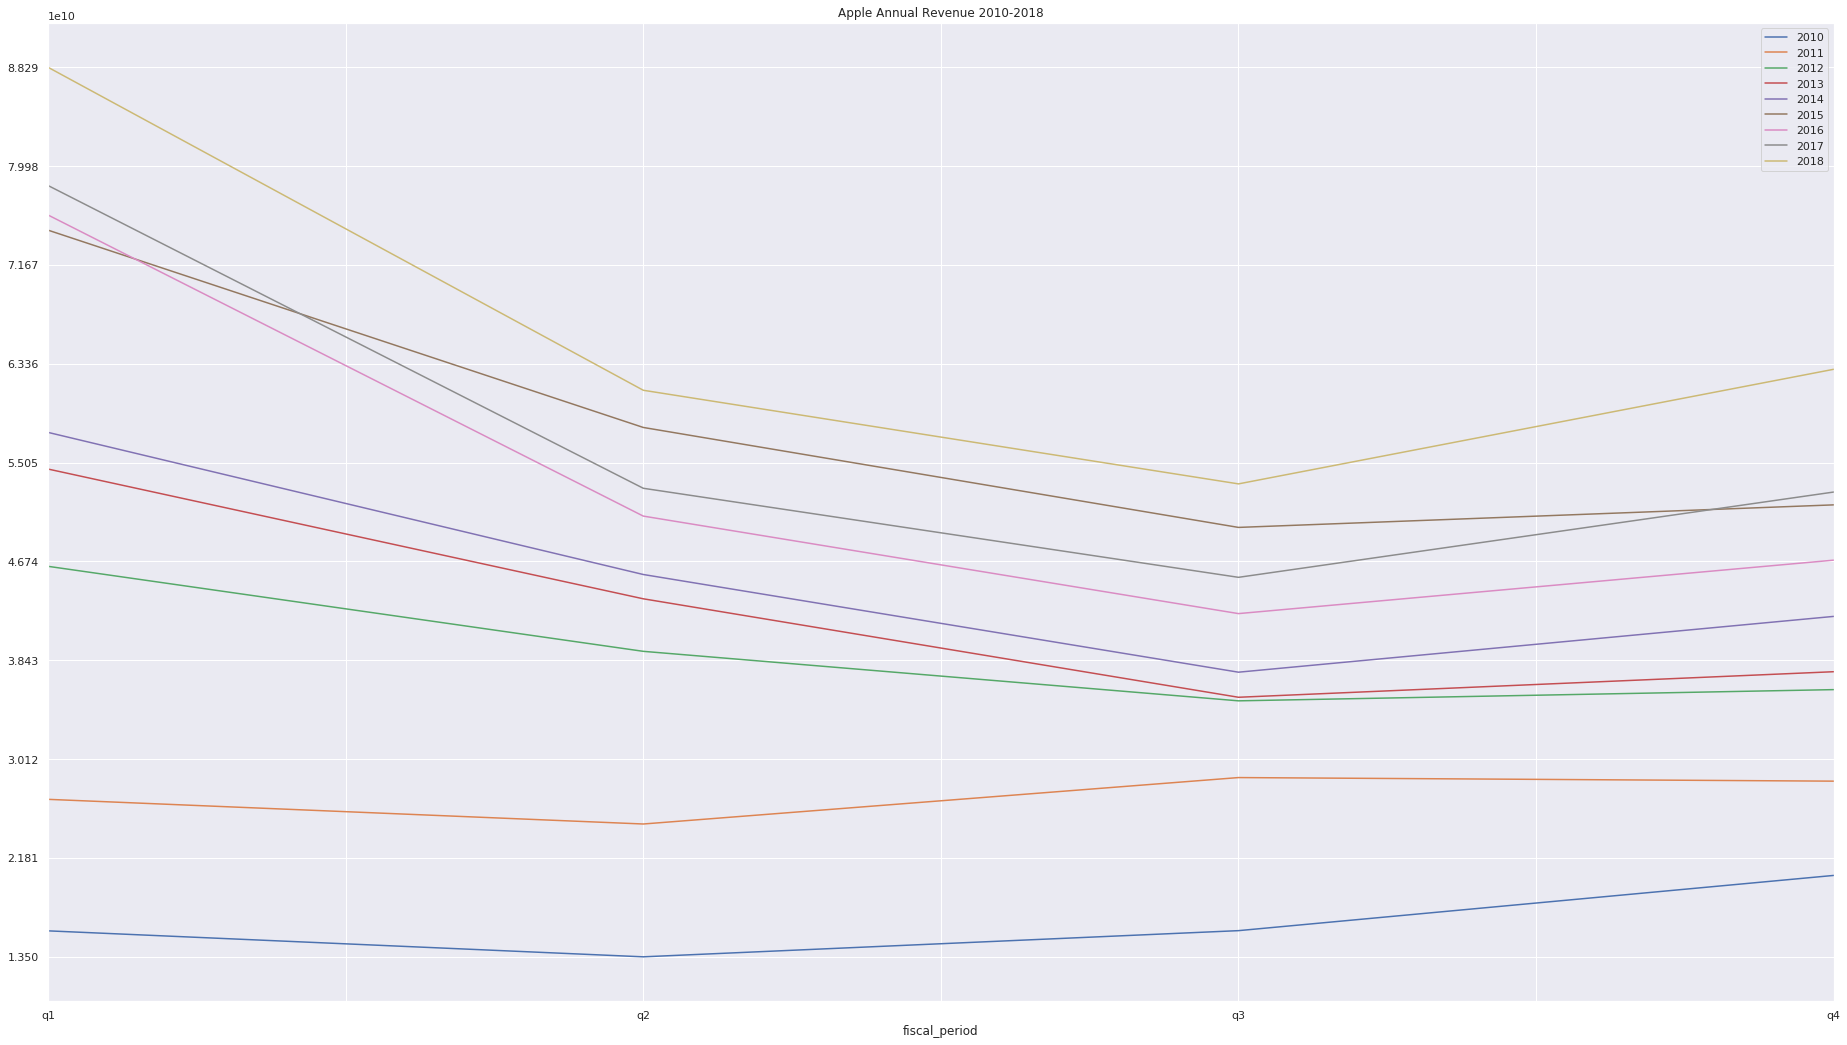

In [ ]:
fig = plt.figure(figsize=(32,18))
ax1 = fig.add_subplot(1,1,1)
legend = []
yticks = np.linspace(apple_revenue_history['value'].min(), apple_revenue_history['value'].max(), 10)
for year in apple_revenue_history['fiscal_year'].unique():
  apple_revenue_year = apple_revenue_history[apple_revenue_history['fiscal_year'] == year]
  legend.append(year)
  apple_revenue_year.plot(y='value', x='fiscal_period', title='Apple Annual Revenue 2010-2018',
                          ax=ax1, yticks=yticks, sharex=True, sharey=True)
ax1.legend(legend)

#### Decomposing Time Series Data
[statsmodel](https://www.statsmodels.org/stable/index.html) enables us to statistically decompose a time series into its components.

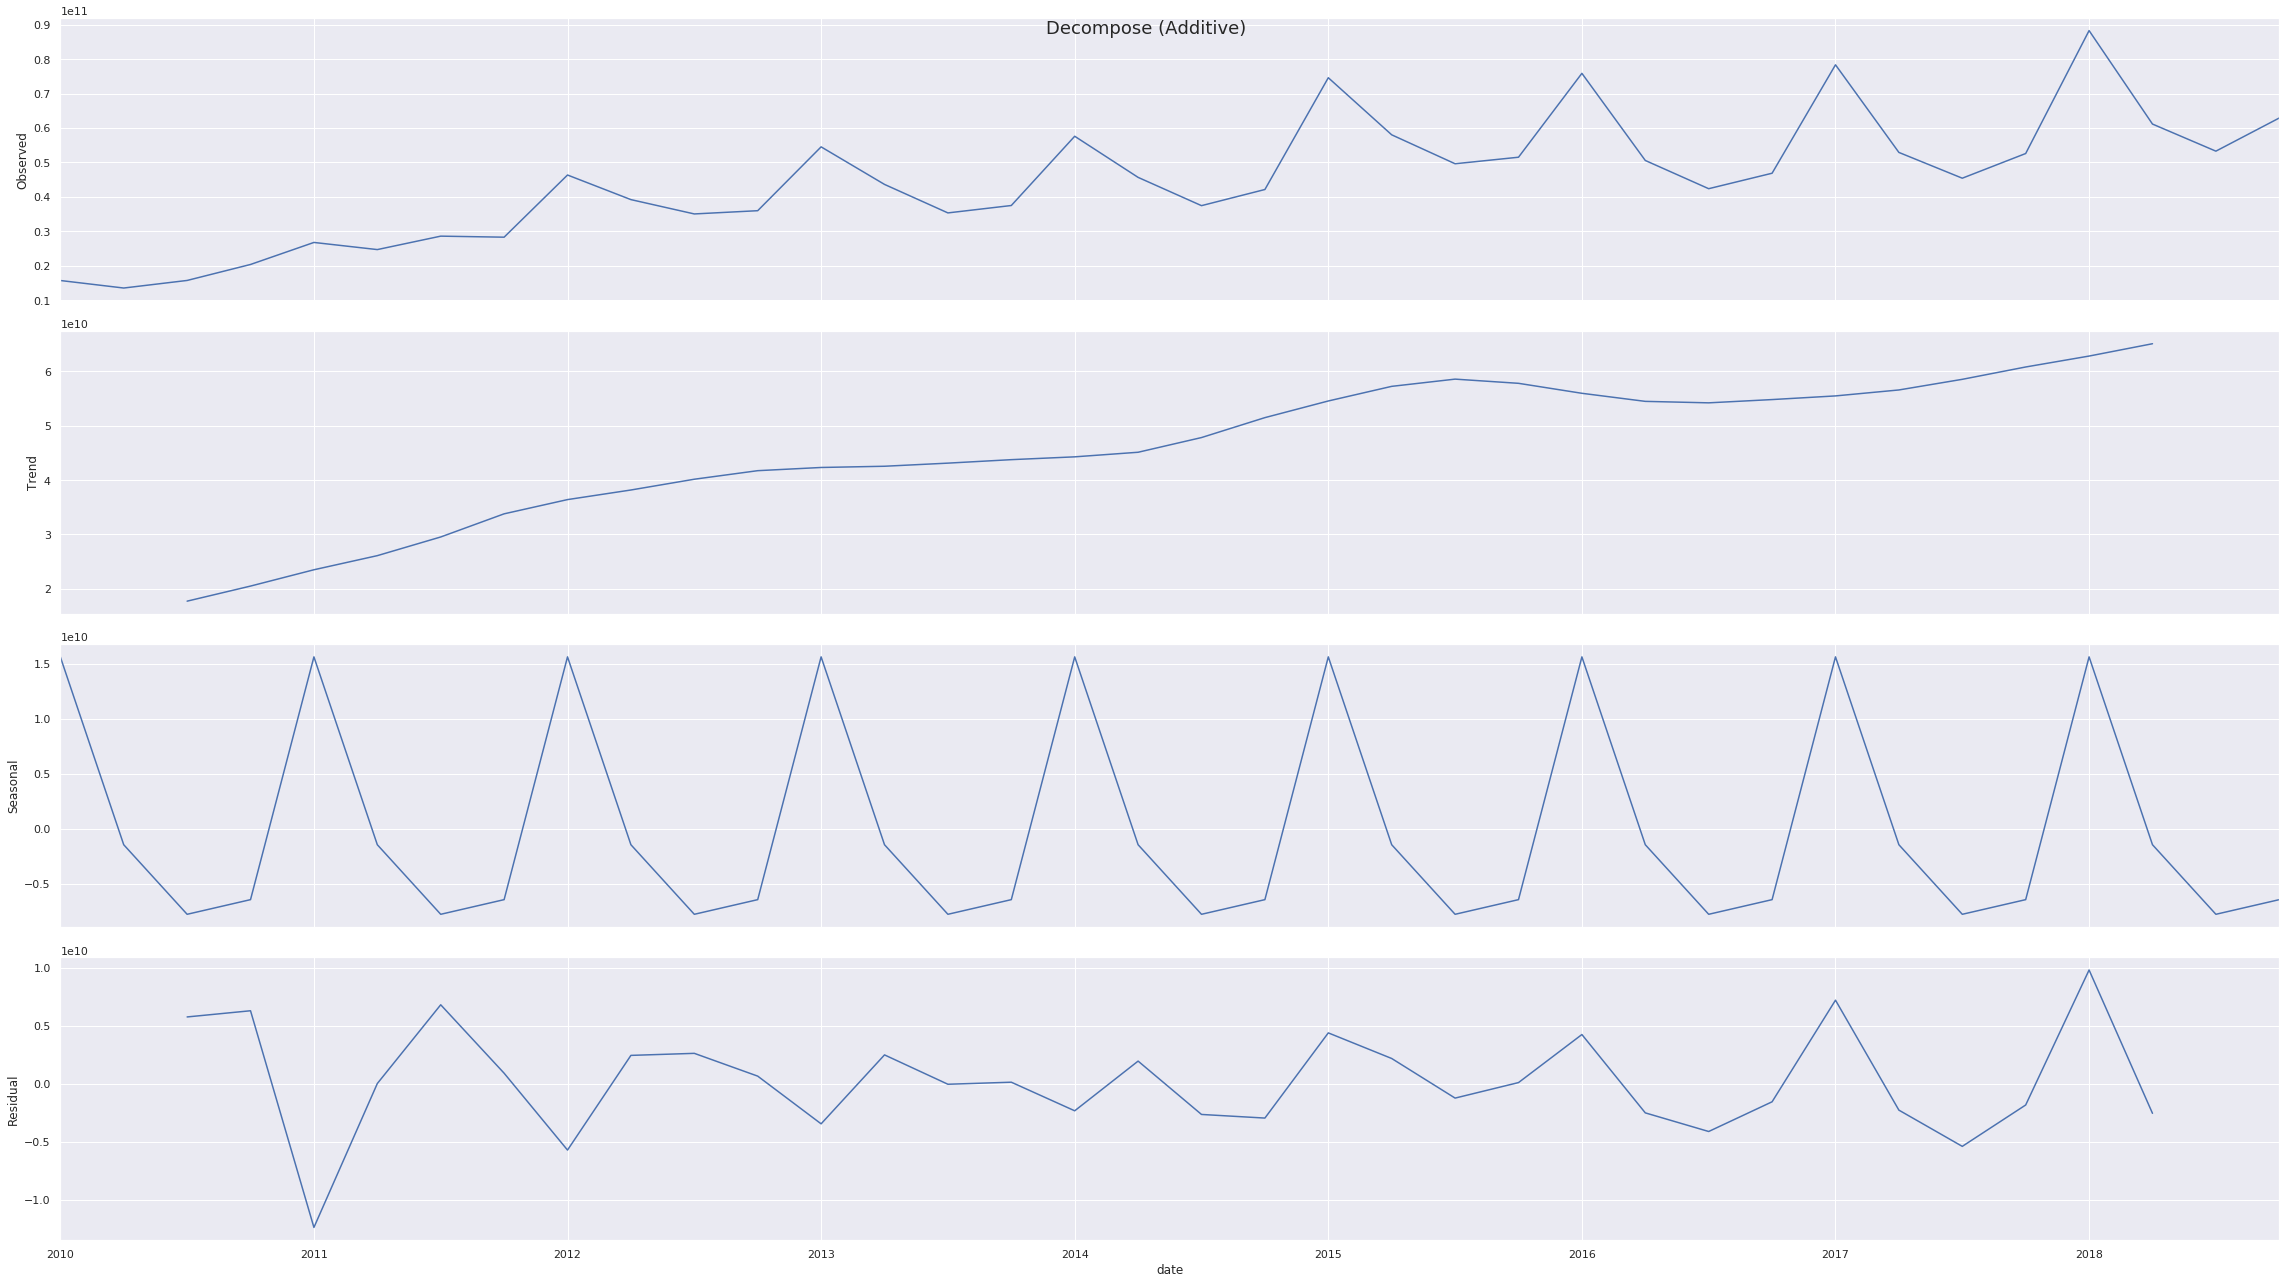

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

apple_revenue_history['date'] = pd.to_datetime(apple_revenue_history['quarter']).dt.to_period('Q')
apple_revenue_history.set_index('date', inplace=True)
apple_revenue_history.index = apple_revenue_history.index.to_timestamp(freq='Q')

# Additive Decomposition
result_add = seasonal_decompose(apple_revenue_history['value'])

# Plot
plt.rcParams.update({'figure.figsize': (32,18)})
result_add.plot().suptitle('Decompose (Additive)', fontsize=18)
plt.show()

### Time Series Stationarity
Time series is different from more traditional classification and regression predictive modeling problems. Time series data is ordered and needs to be stationary for meaningful summary statistics.

[Stationarity](https://en.wikipedia.org/wiki/Stationary_process) is an assumption underlying many statistical procedures used in time series analysis, and non-stationarity data are often transformed into stationary data. 

 Stationarity is sometimes categorized into the following:
* Stationary Process/Model: Stationary series of observations.
* Trend Stationary: Does not exhibit a trend.
* Seasonal Stationary: Does not exhibit seasonality.
* Strictly Stationary: Mathematical definition of a stationary process.

In a stationary time series, the mean and standard deviation of a time series is constant. Additionally, there is no seasonality, cyclicality, or other time-dependent structure. It's often easier to understand if a time series is stationary to first look at how stationarity can be violated. 

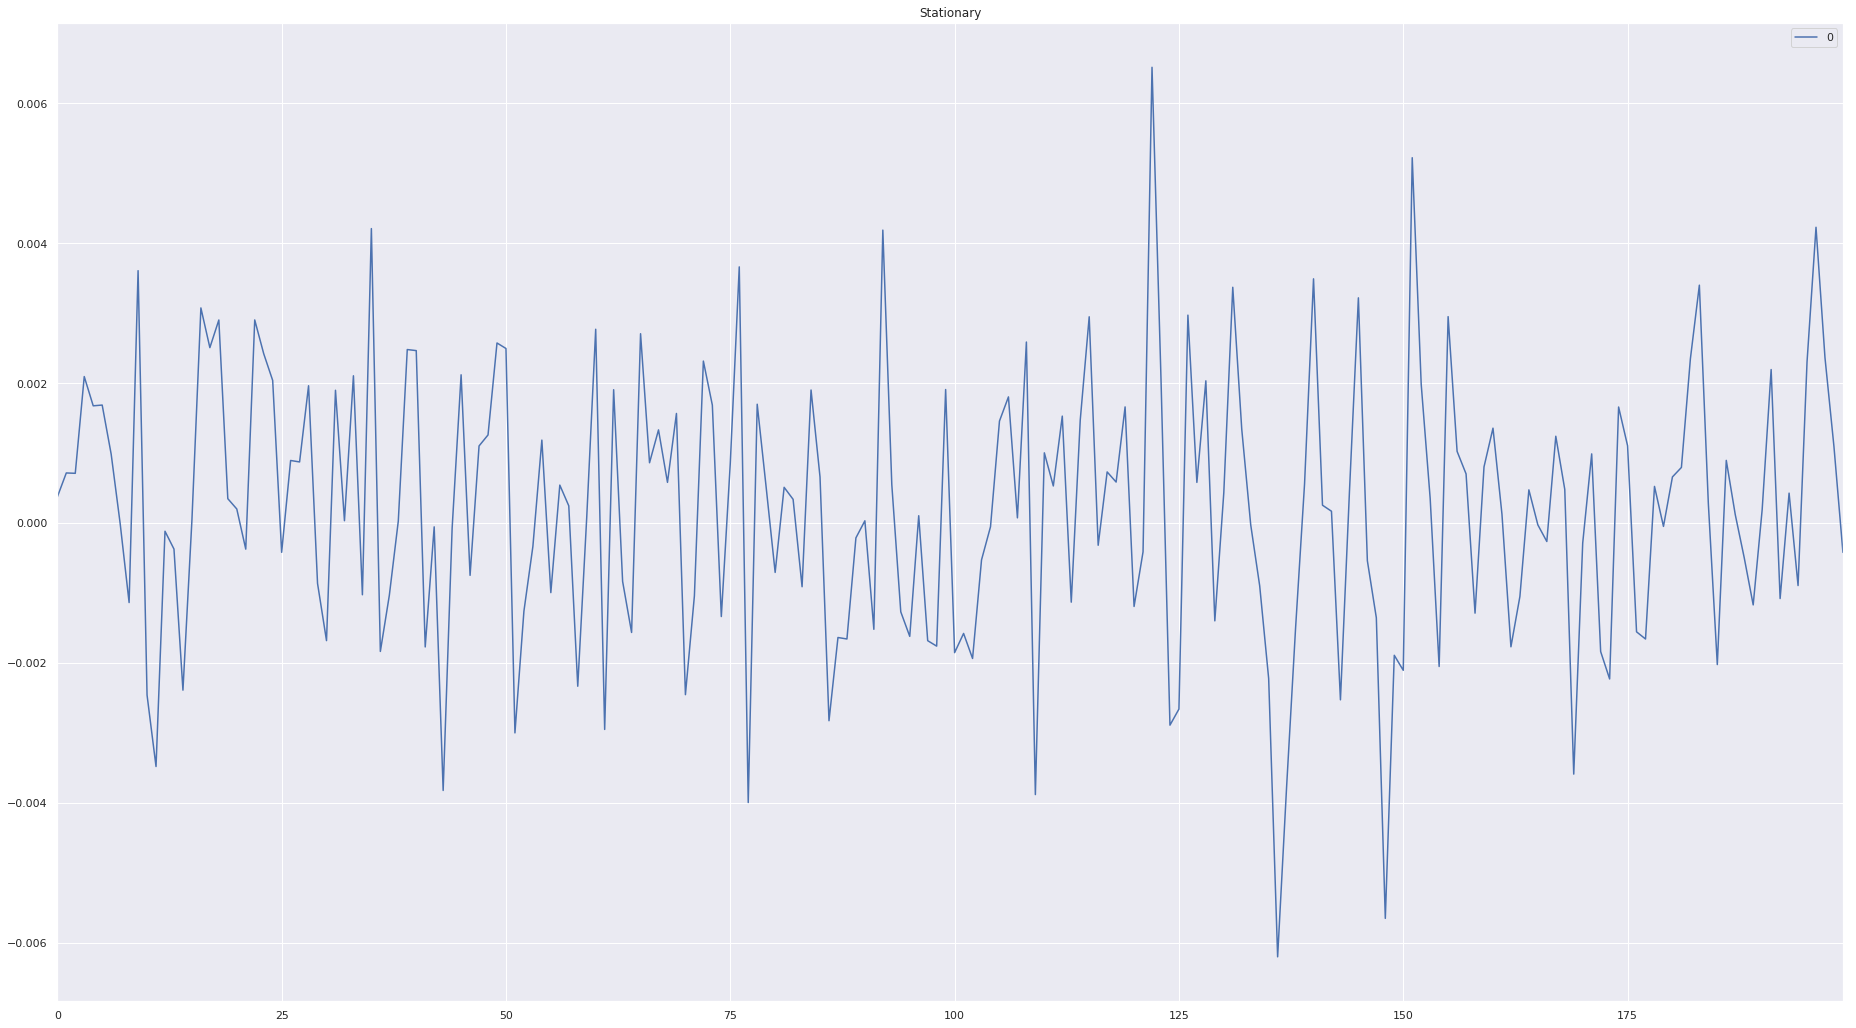

In [ ]:
# Stationary
vol = .002
df1 = pd.DataFrame(np.random.normal(size=200) * vol)
df1.plot(title='Stationary')

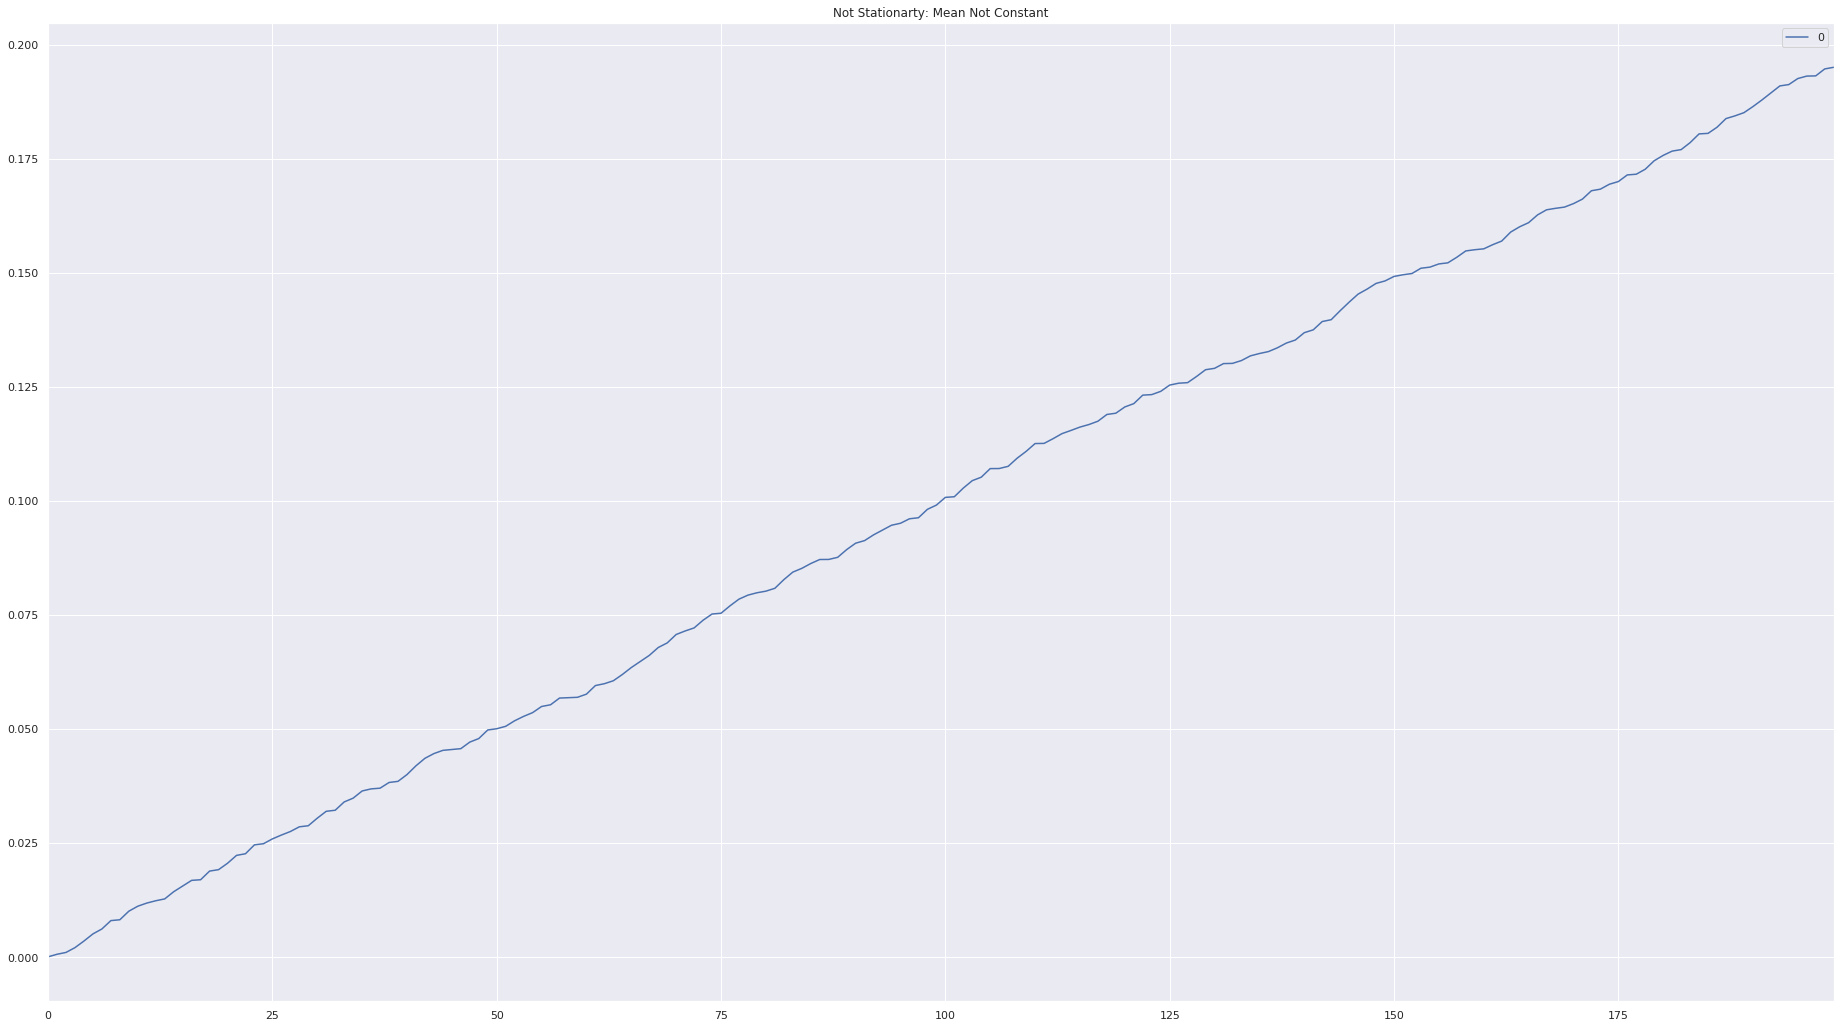

In [ ]:
df2 = pd.DataFrame(np.random.random(size=200) * vol).cumsum()
df2.plot(title='Not Stationarty: Mean Not Constant')


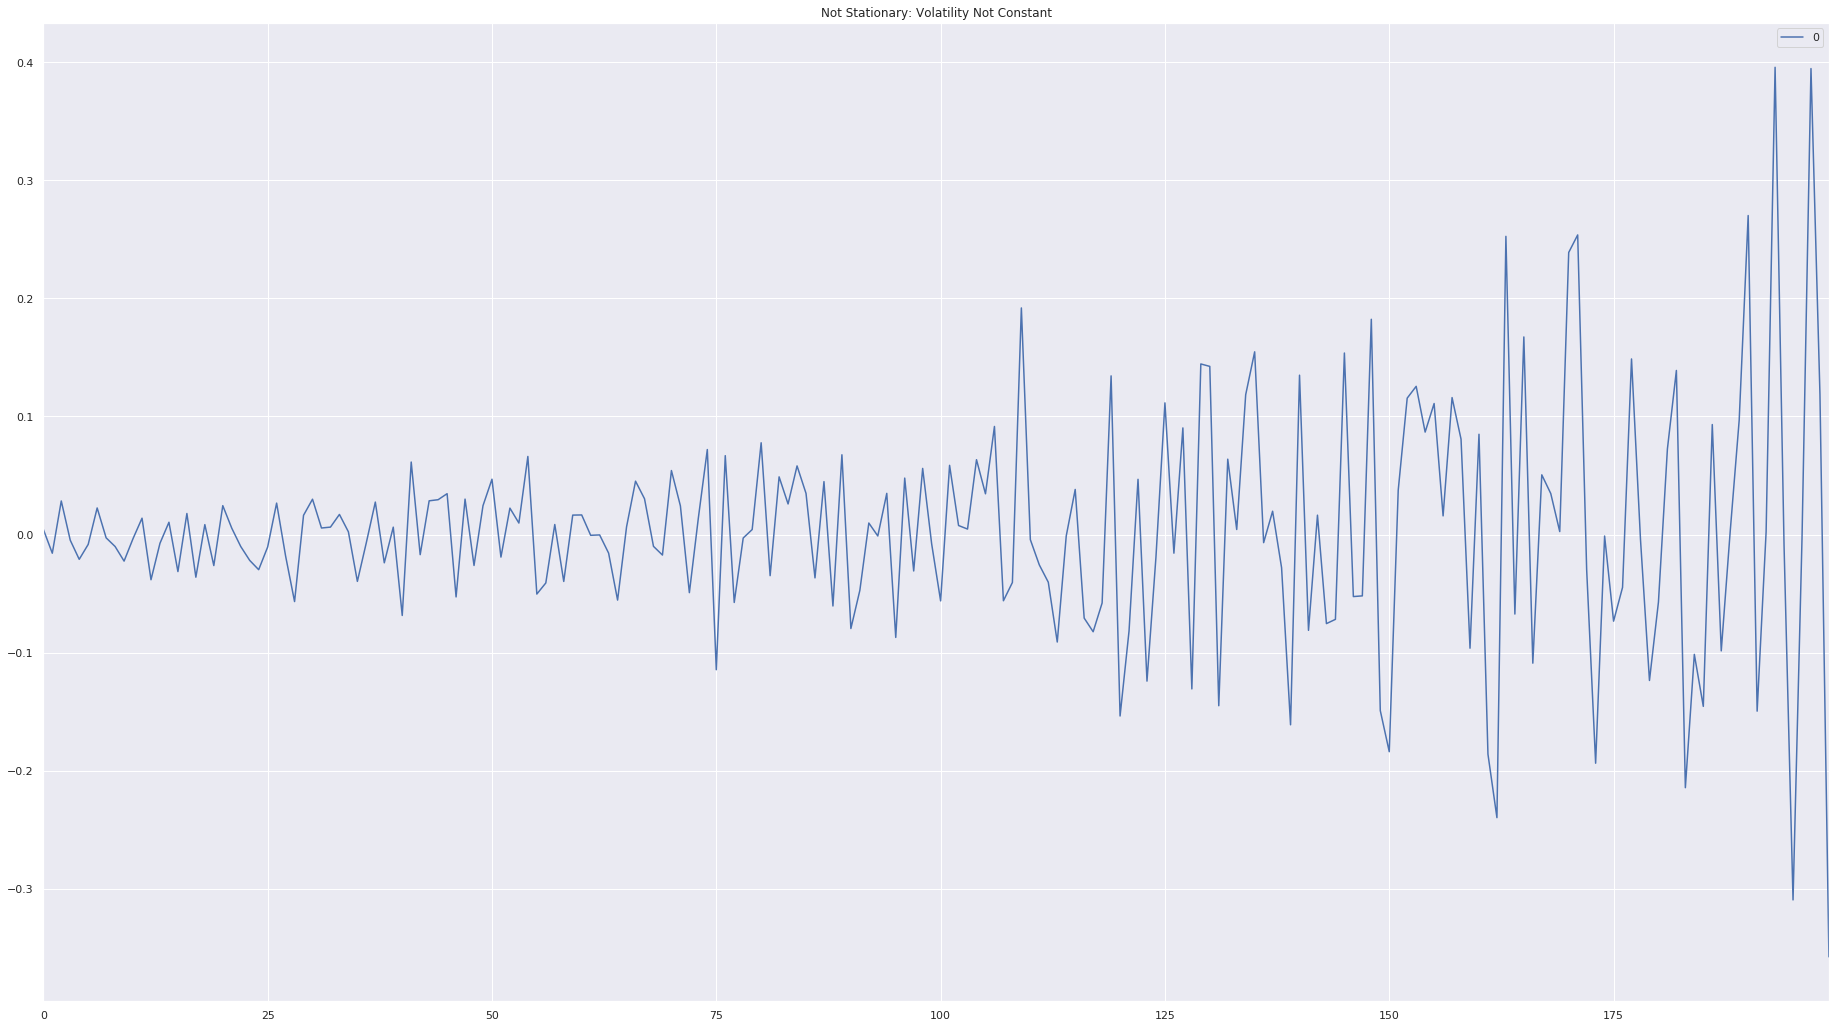

In [ ]:
df3 = pd.DataFrame(np.random.normal(size=200) * vol * np.logspace(1,2,num=200, dtype=int))
df3.plot(title='Not Stationary: Volatility Not Constant')

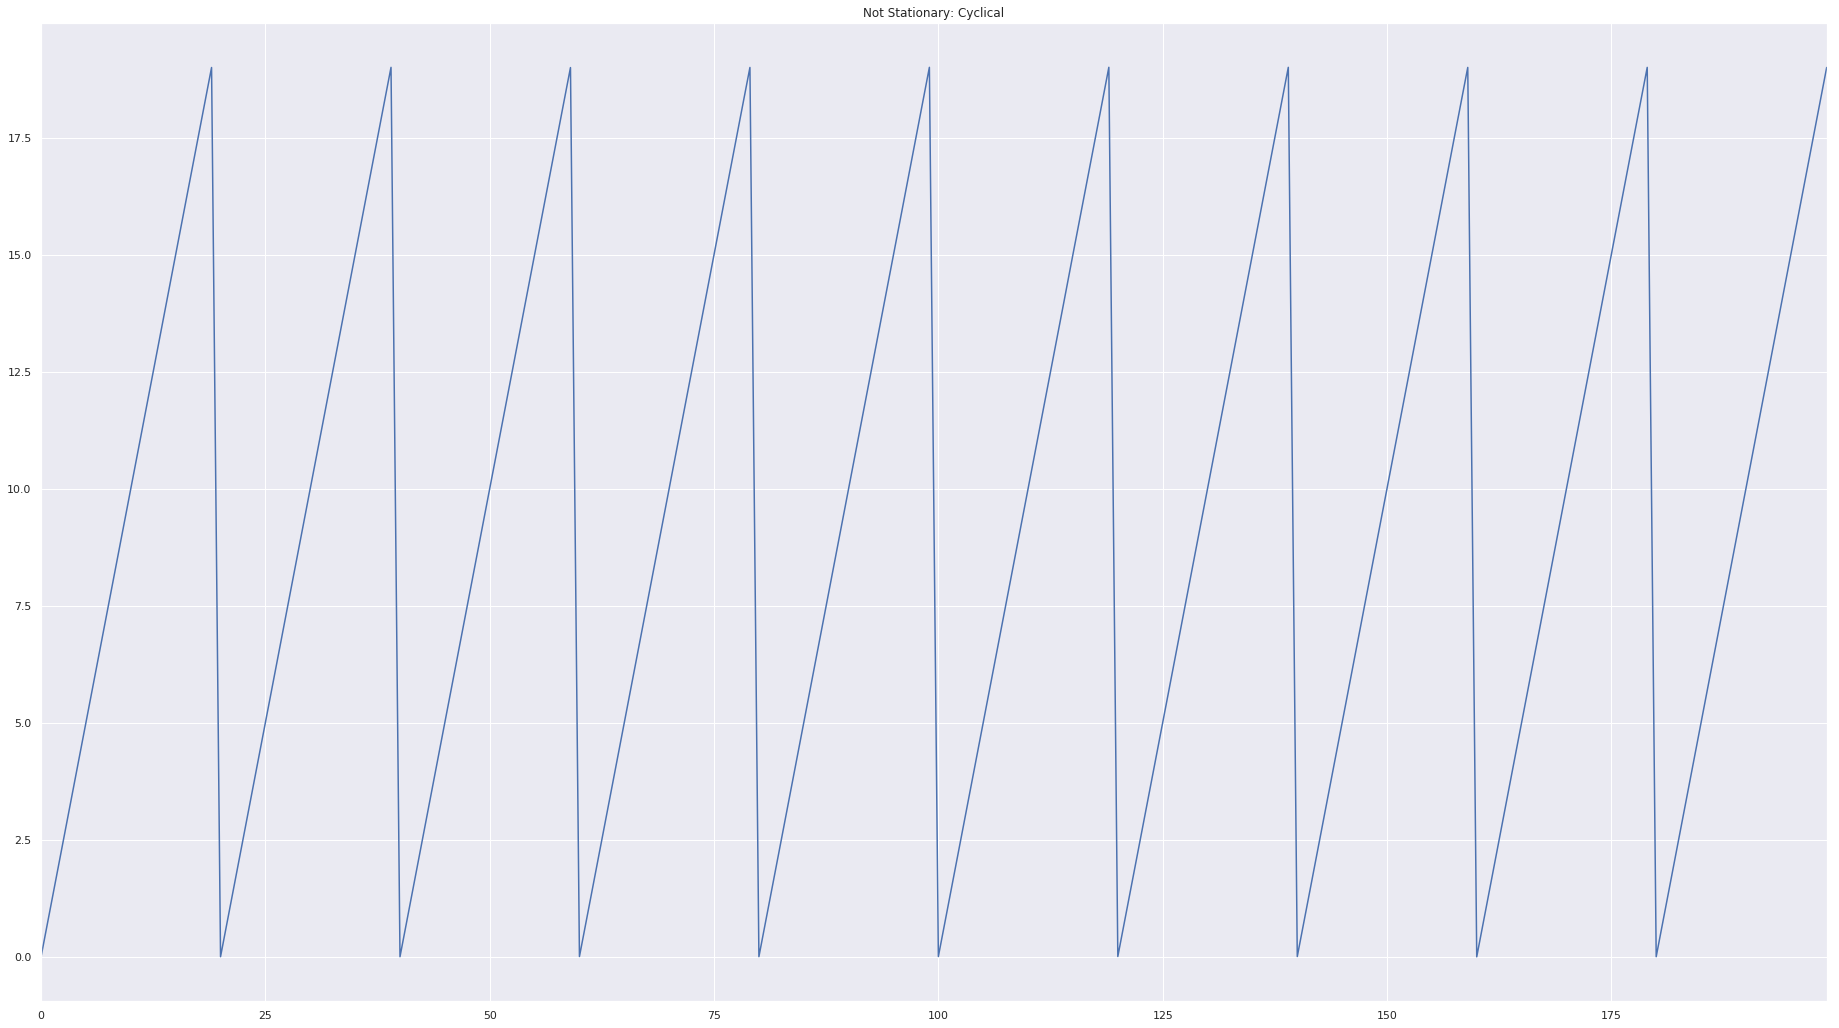

In [ ]:
df4 = pd.DataFrame(np.random.normal(size=200) * vol)
df4['cyclical'] = df4.index.values % 20
df4[0] = df4[0] + df4['cyclical']
df4[0].plot(title='Not Stationary: Cyclical')

#### How to Test for Stationarity
We can test for stationarity by visually inspecting the graphs above, as we did earlier; by splitting the graphs into multiple sections and looking at summary statistics such as mean, variance and correlation; or we can use more advanced methods like the [Augmented Dickey-Fuller  test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test).

The Augmented Dickey–Fuller tests that a [unit root](https://en.wikipedia.org/wiki/Unit_root) is not present. If the time series has a unit root, it has some time-dependent structure meaning the time series is not stationary.

The more negative this statistic, the more likely have a stationary time series. In general, if the p-value > 0.05 the data has unit root and it is not stationary. Let's use statsmodel to examine this.



In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

df1 = pd.DataFrame(np.random.normal(size=200))
result = adfuller(df1[0].values, autolag='AIC')
print(f'ADF Statistic: {result[0]:.2f}')
print(f'p-value: {result[1]:.2f}')
for key, value in result[4].items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
print("\n")
df2 = pd.DataFrame(np.random.randn(200) + df1.index.values)
result = adfuller(df2[0].values, autolag='AIC')
print(f'ADF Statistic: {result[0]:.2f}')
print(f'p-value: {result[1]:.2f}')
for key, value in result[4].items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')

ADF Statistic: -11.14
p-value: 0.00
Critial Values:
   1%, -3.46
Critial Values:
   5%, -2.88
Critial Values:
   10%, -2.57


ADF Statistic: -0.81
p-value: 0.81
Critial Values:
   1%, -3.47
Critial Values:
   5%, -2.88
Critial Values:
   10%, -2.58


Running the examples prints the test statistic values of 0.00 (stationary) and 0.88 (non-stationary), respectively. 

#### How to Handle Non-Stationary Time Series
If there is a clear trend and seasonality in a time series, then model these components, remove them from observations, then train models on the residuals.


#### Detrending a Time Series

There are multiple methods to remove the trend component from a time series. 

1. Subtract best fit line
2. Subtract using a decomposition
3. Subtract using a filter


##### Filter

##### Best Fit Line Using SciPy
[Detrend](https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.signal.detrend.html) from SciPy allows us to remove the trend by subtracting the best fit line.

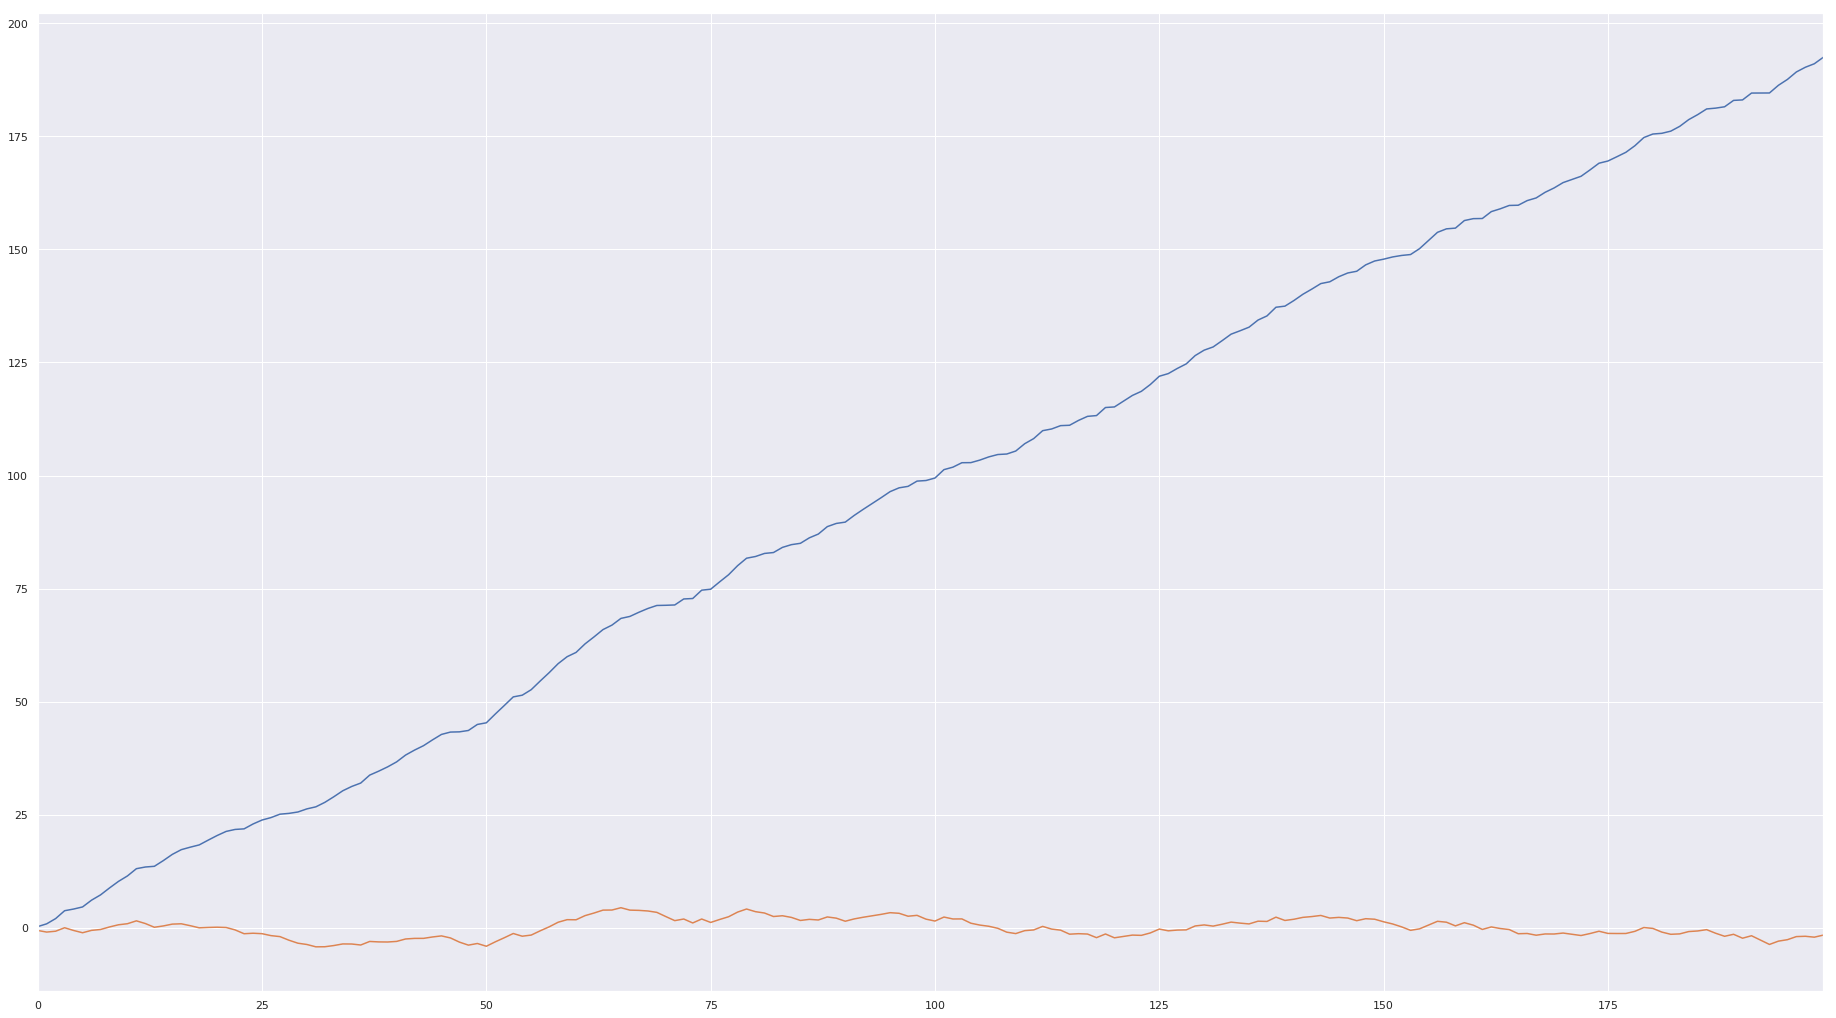

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

vol = 2
df = pd.DataFrame(np.random.random(size=200) * vol).cumsum()
df[0].plot(figsize=(32,18))
detrend = signal.detrend(df[0].values)
plt.plot(detrend)


#### Decomposition Using StatsModels
[seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose) returns an object with seasonal, trend, and resid attributes that we can subtract from our series values.


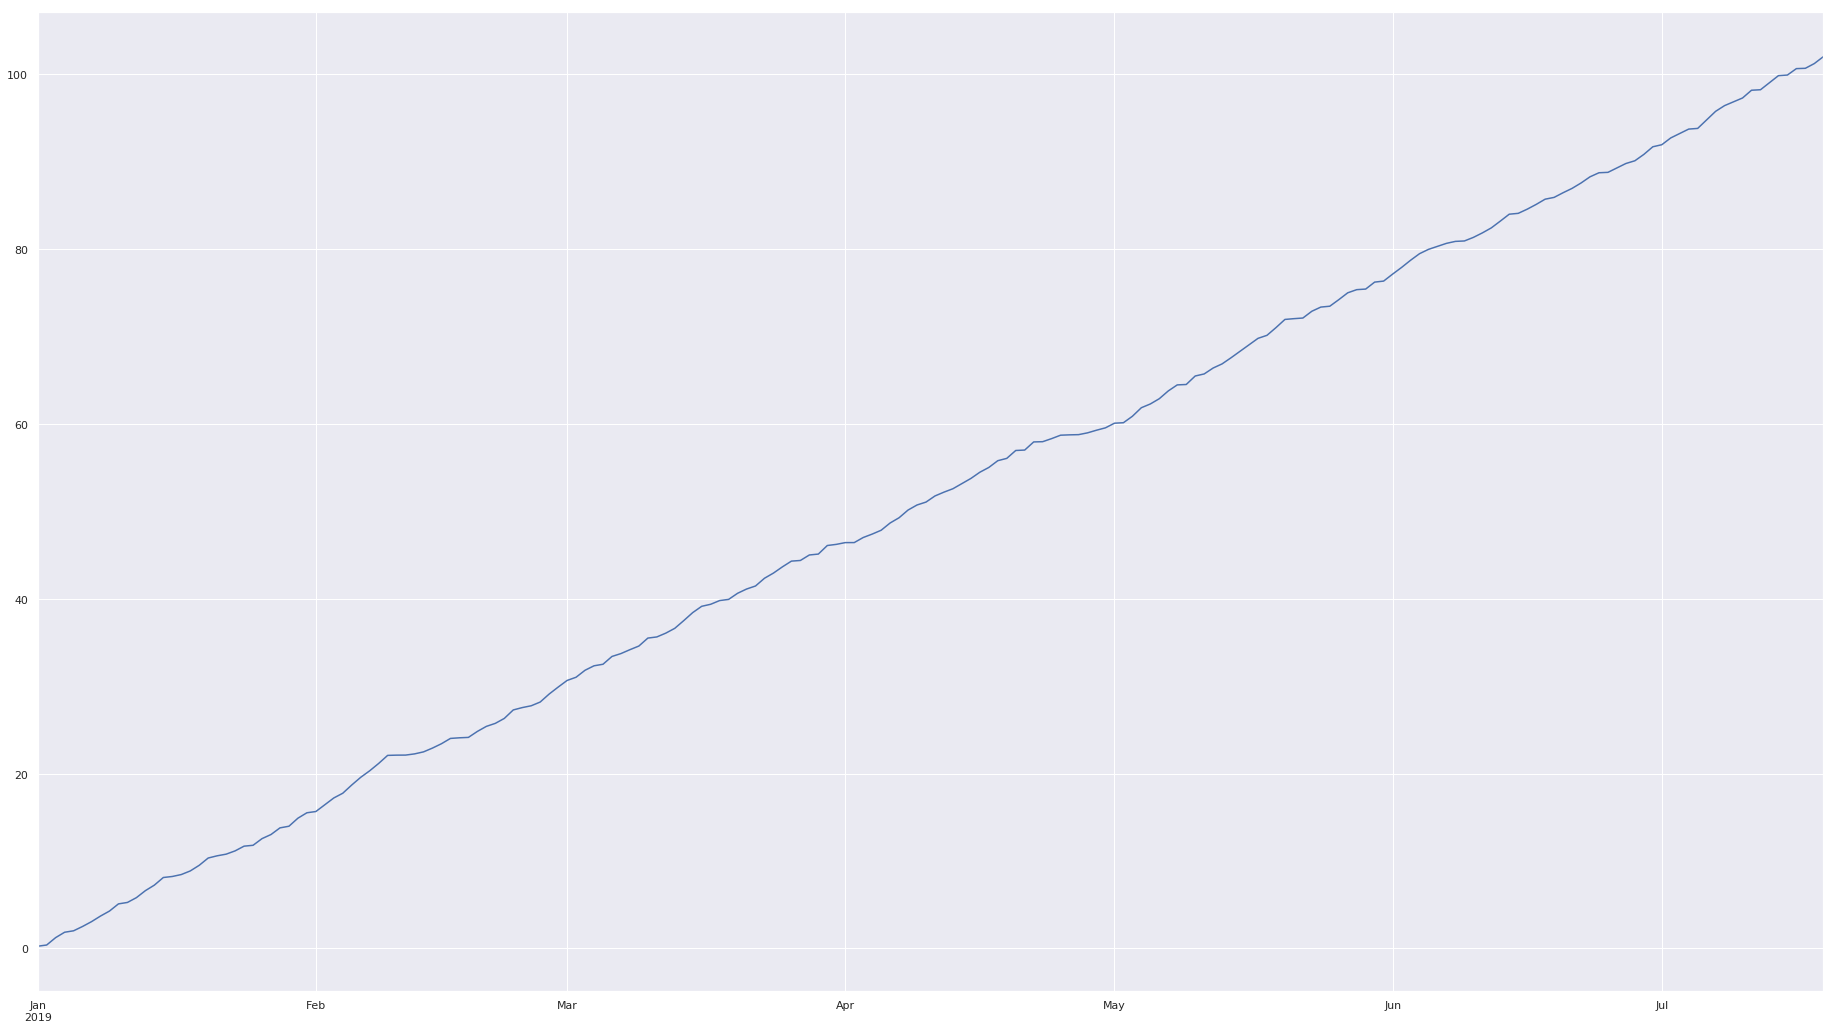

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

dates = pd.date_range('2019-01-01', periods=200, freq='D')
df = pd.DataFrame(np.random.random(200)).cumsum()
df.set_index(dates, inplace=True)
df[0].plot(figsize=(32,18))

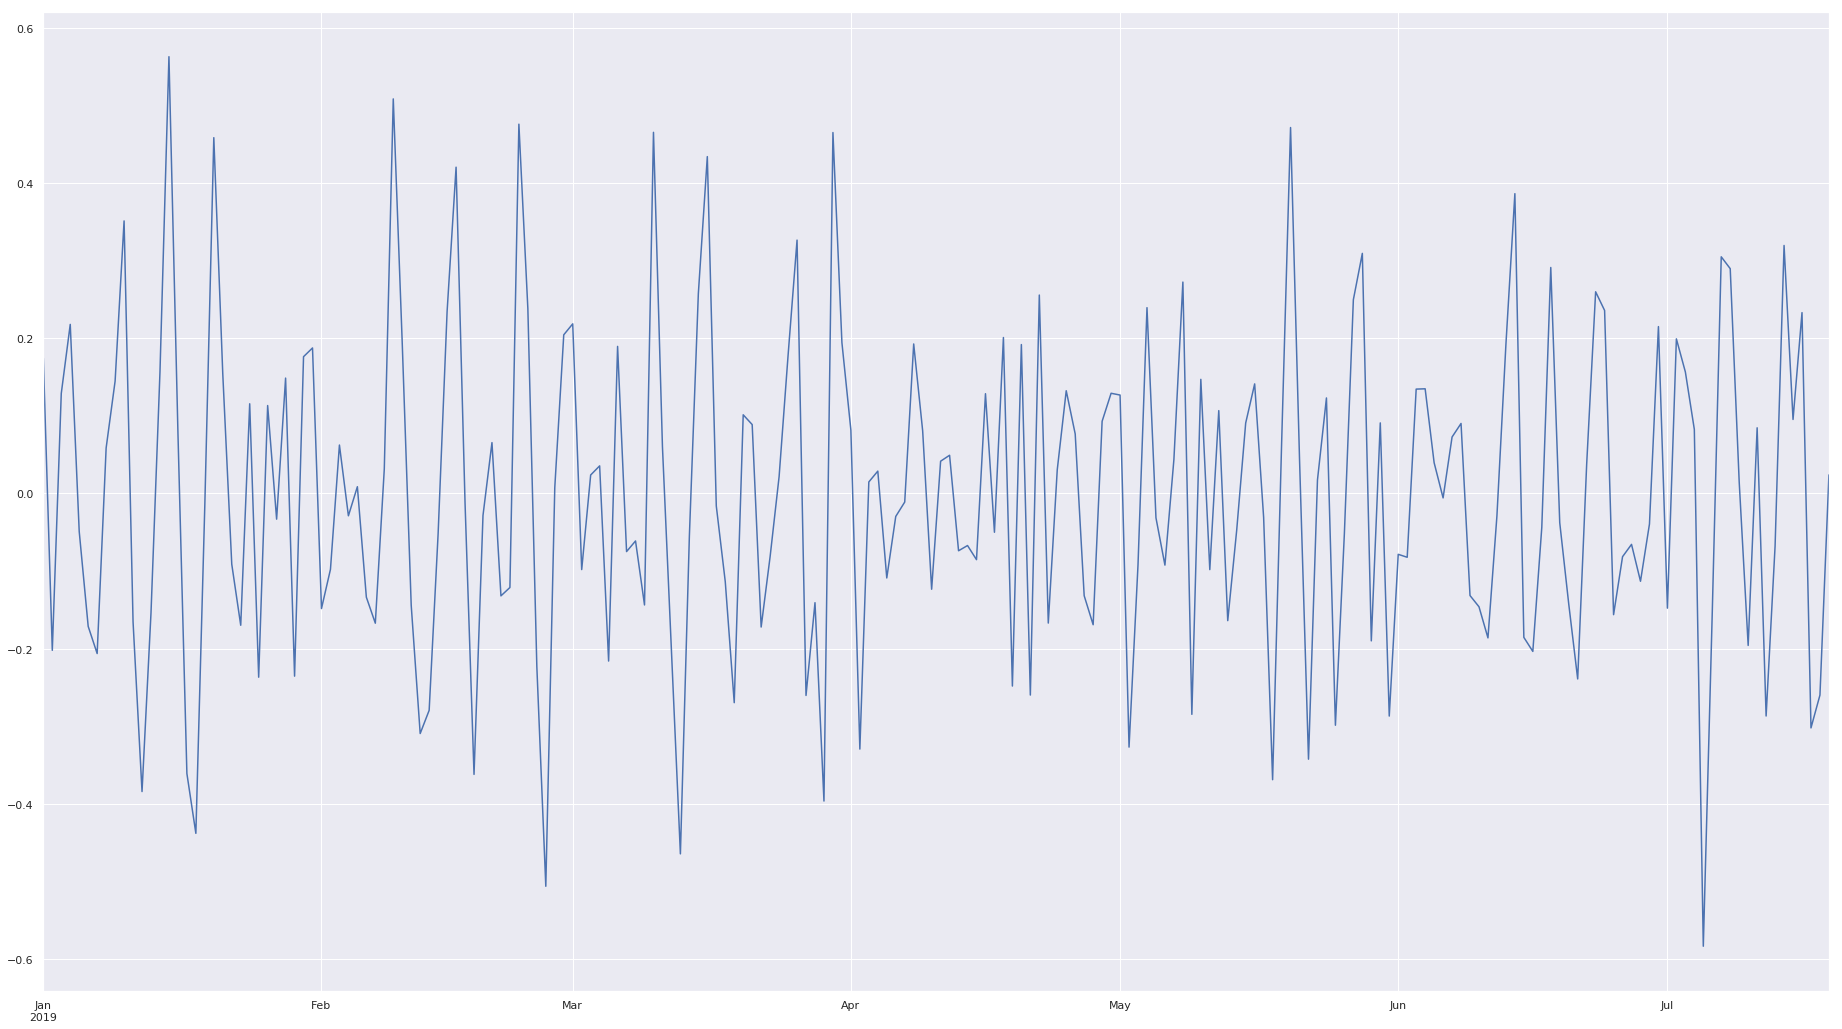

In [ ]:

decompose = seasonal_decompose(df[0], model='additive', extrapolate_trend='freq')
df[0] = df[0] - decompose.trend
df[0].plot(figsize=(32,18))

## Additional Resources
* [Python for Finance: A QuickStart](https://analyzingalpha.com/python-for-finance)
* [Data Manipluation with Python](https://analyzingalpha.com/data-manipluation-with-python-and-pandas)
* [Python Data Visualization for Finance](https://analyzingalpha.com/python-data-visualization)